In [1]:
IMAGE_DIMS = (50, 34, 50, 1)

INPUT_FOLDER = '../../input/sample_images/'
OUTPUT_FOLDER = '../../output/step10/'

DATASET_NAME_SUFFIX = '-centered-rotated'
PATIENTS_FILE = '../../input/sample_dummy_submission.csv'
CNN_MODEL_FILE = '../../output/train-local/tf-checkpoint-best7826'

_model = None

In [2]:
import csv
import h5py
import numpy as np # linear algebra
import os
import logging

import tflearn
from tflearn.layers.core import *
from tflearn.layers.conv import *
from tflearn.data_utils import *
from tflearn.layers.normalization import *
from tflearn.layers.estimator import regression

from modules.logging import logger
import modules.logging
import modules.lungprepare as lungprepare
import modules.utils as utils
import modules.cnn as cnn
from modules.utils import Timer

In [3]:
def get_patient_ids(patients_file):
    patients = []
    
    file = csv.DictReader(open(patients_file))
    for row in file:
        p = row['id']
        patients.append(p)
    logger.info('found {} patients for prediction'.format(len(patients)))
    
    return patients

In [4]:
def start_processing(input_dir, patients_file, cnn_model_file, max_patients, image_dims, output_dir):
    logger.info('Predicting patients. ' + ' max_patients='+ str(max_patients) + ' input_dir=' + input_dir + ' output_dir=' + output_dir)
    
    logger.info('Preparing output dir')
    utils.mkdirs(output_dir, dirs=['images'], recreate=False)

    modules.logging.setup_file_logger(output_dir + 'out.log')

    network = cnn.net_simplest1(image_dims)
    model = cnn.prepare_cnn_model(network, output_dir, model_file=cnn_model_file)
    
    logger.info('Collect patient ids for analysis')
    patient_ids = get_patient_ids(patients_file)
    total_patients = len(patient_ids)
    logger.debug('Found ' + str(total_patients) + ' patients')

    count = 0
    for patient_id in patient_ids:
        if(count>(max_patients-1)):
            break

        y = cnn.predict_patient(input_dir, patient_id, image_dims, model, output_dir)
        logger.info("Prediction for patient " + patient_id + ' is ' + str(y))

        count = count + 1

2017-02-22 02:59:05,816 INFO ==== PROCESSING PREDICTION ====
2017-02-22 02:59:05,817 INFO Predicting patients.  max_patients=9 input_dir=../../input/sample_images/ output_dir=../../output/step10/
2017-02-22 02:59:05,818 INFO Preparing output dir
2017-02-22 02:59:05,936 INFO Prepare CNN
2017-02-22 02:59:05,937 INFO Preparing output dir
2017-02-22 02:59:05,938 INFO Load engine...
2017-02-22 02:59:07,438 INFO Load previous training...
2017-02-22 02:59:08,102 INFO Collect patient ids for analysis
2017-02-22 02:59:08,103 INFO found 19 patients for prediction
2017-02-22 02:59:08,104 DEBUG Found 19 patients
2017-02-22 02:59:08,105 INFO >>> Predict patient_id 0de72529c30fe642bc60dcb75c87f6bd
2017-02-22 02:59:08,106 INFO Loading pre-processed images for patient
2017-02-22 02:59:08,108 DEBUG Patient image not found in cache
2017-02-22 02:59:08,109 INFO > [started] Preparing patient scan image volume. patient_id=0de72529c30fe642bc60dcb75c87f6bd...
2017-02-22 02:59:08,110 INFO > [started] load_sca

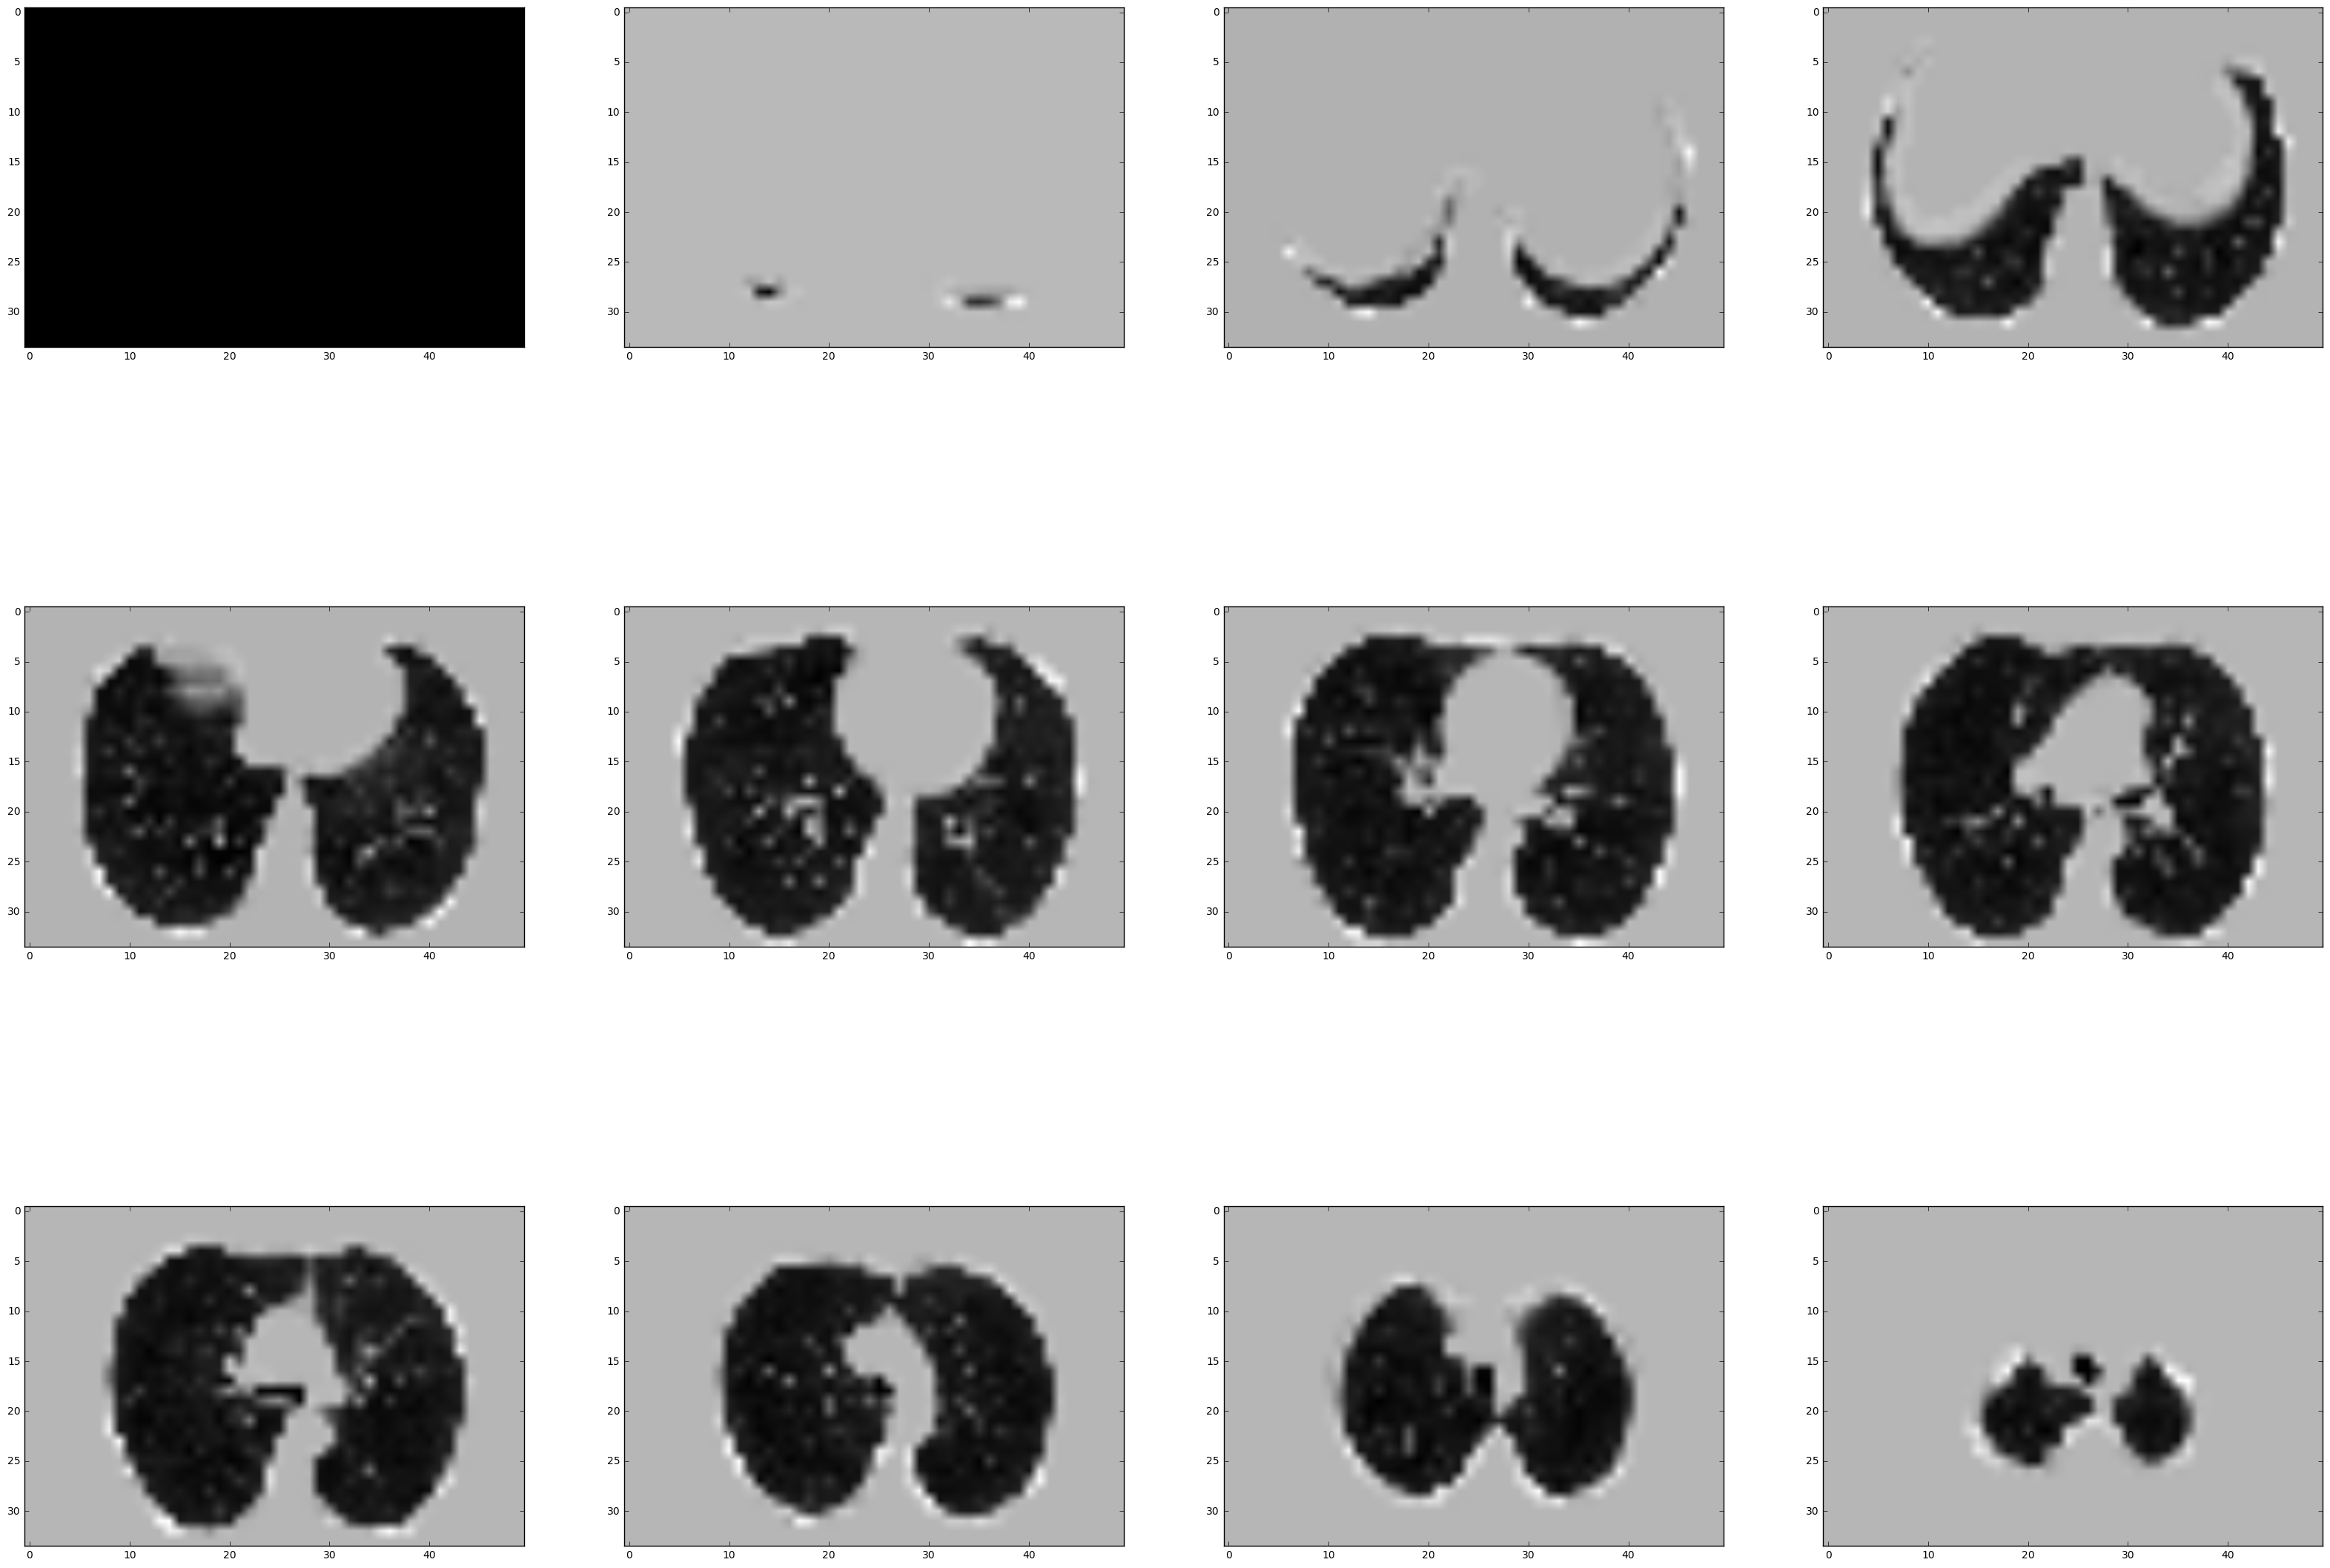

2017-02-22 02:59:38,623 INFO > [done]    Predicting result on CNN (forward) (5642.188 ms)
2017-02-22 02:59:38,628 INFO Prediction for patient 0de72529c30fe642bc60dcb75c87f6bd is [[0.904554009437561, 0.095445916056633]]
2017-02-22 02:59:38,628 INFO >>> Predict patient_id 0ddeb08e9c97227853422bd71a2a695e
2017-02-22 02:59:38,629 INFO Loading pre-processed images for patient
2017-02-22 02:59:38,630 DEBUG Patient image not found in cache
2017-02-22 02:59:38,631 INFO > [started] Preparing patient scan image volume. patient_id=0ddeb08e9c97227853422bd71a2a695e...
2017-02-22 02:59:38,632 INFO > [started] load_scan ../../input/sample_images/0ddeb08e9c97227853422bd71a2a695e...
2017-02-22 02:59:39,221 INFO > [done]    load_scan ../../input/sample_images/0ddeb08e9c97227853422bd71a2a695e (589.150 ms)
2017-02-22 02:59:39,507 INFO > [started] resample...
2017-02-22 03:00:04,376 INFO > [done]    resample (24868.766 ms)
2017-02-22 03:00:04,381 INFO > [started] segment_lung_mask...
2017-02-22 03:00:10,90

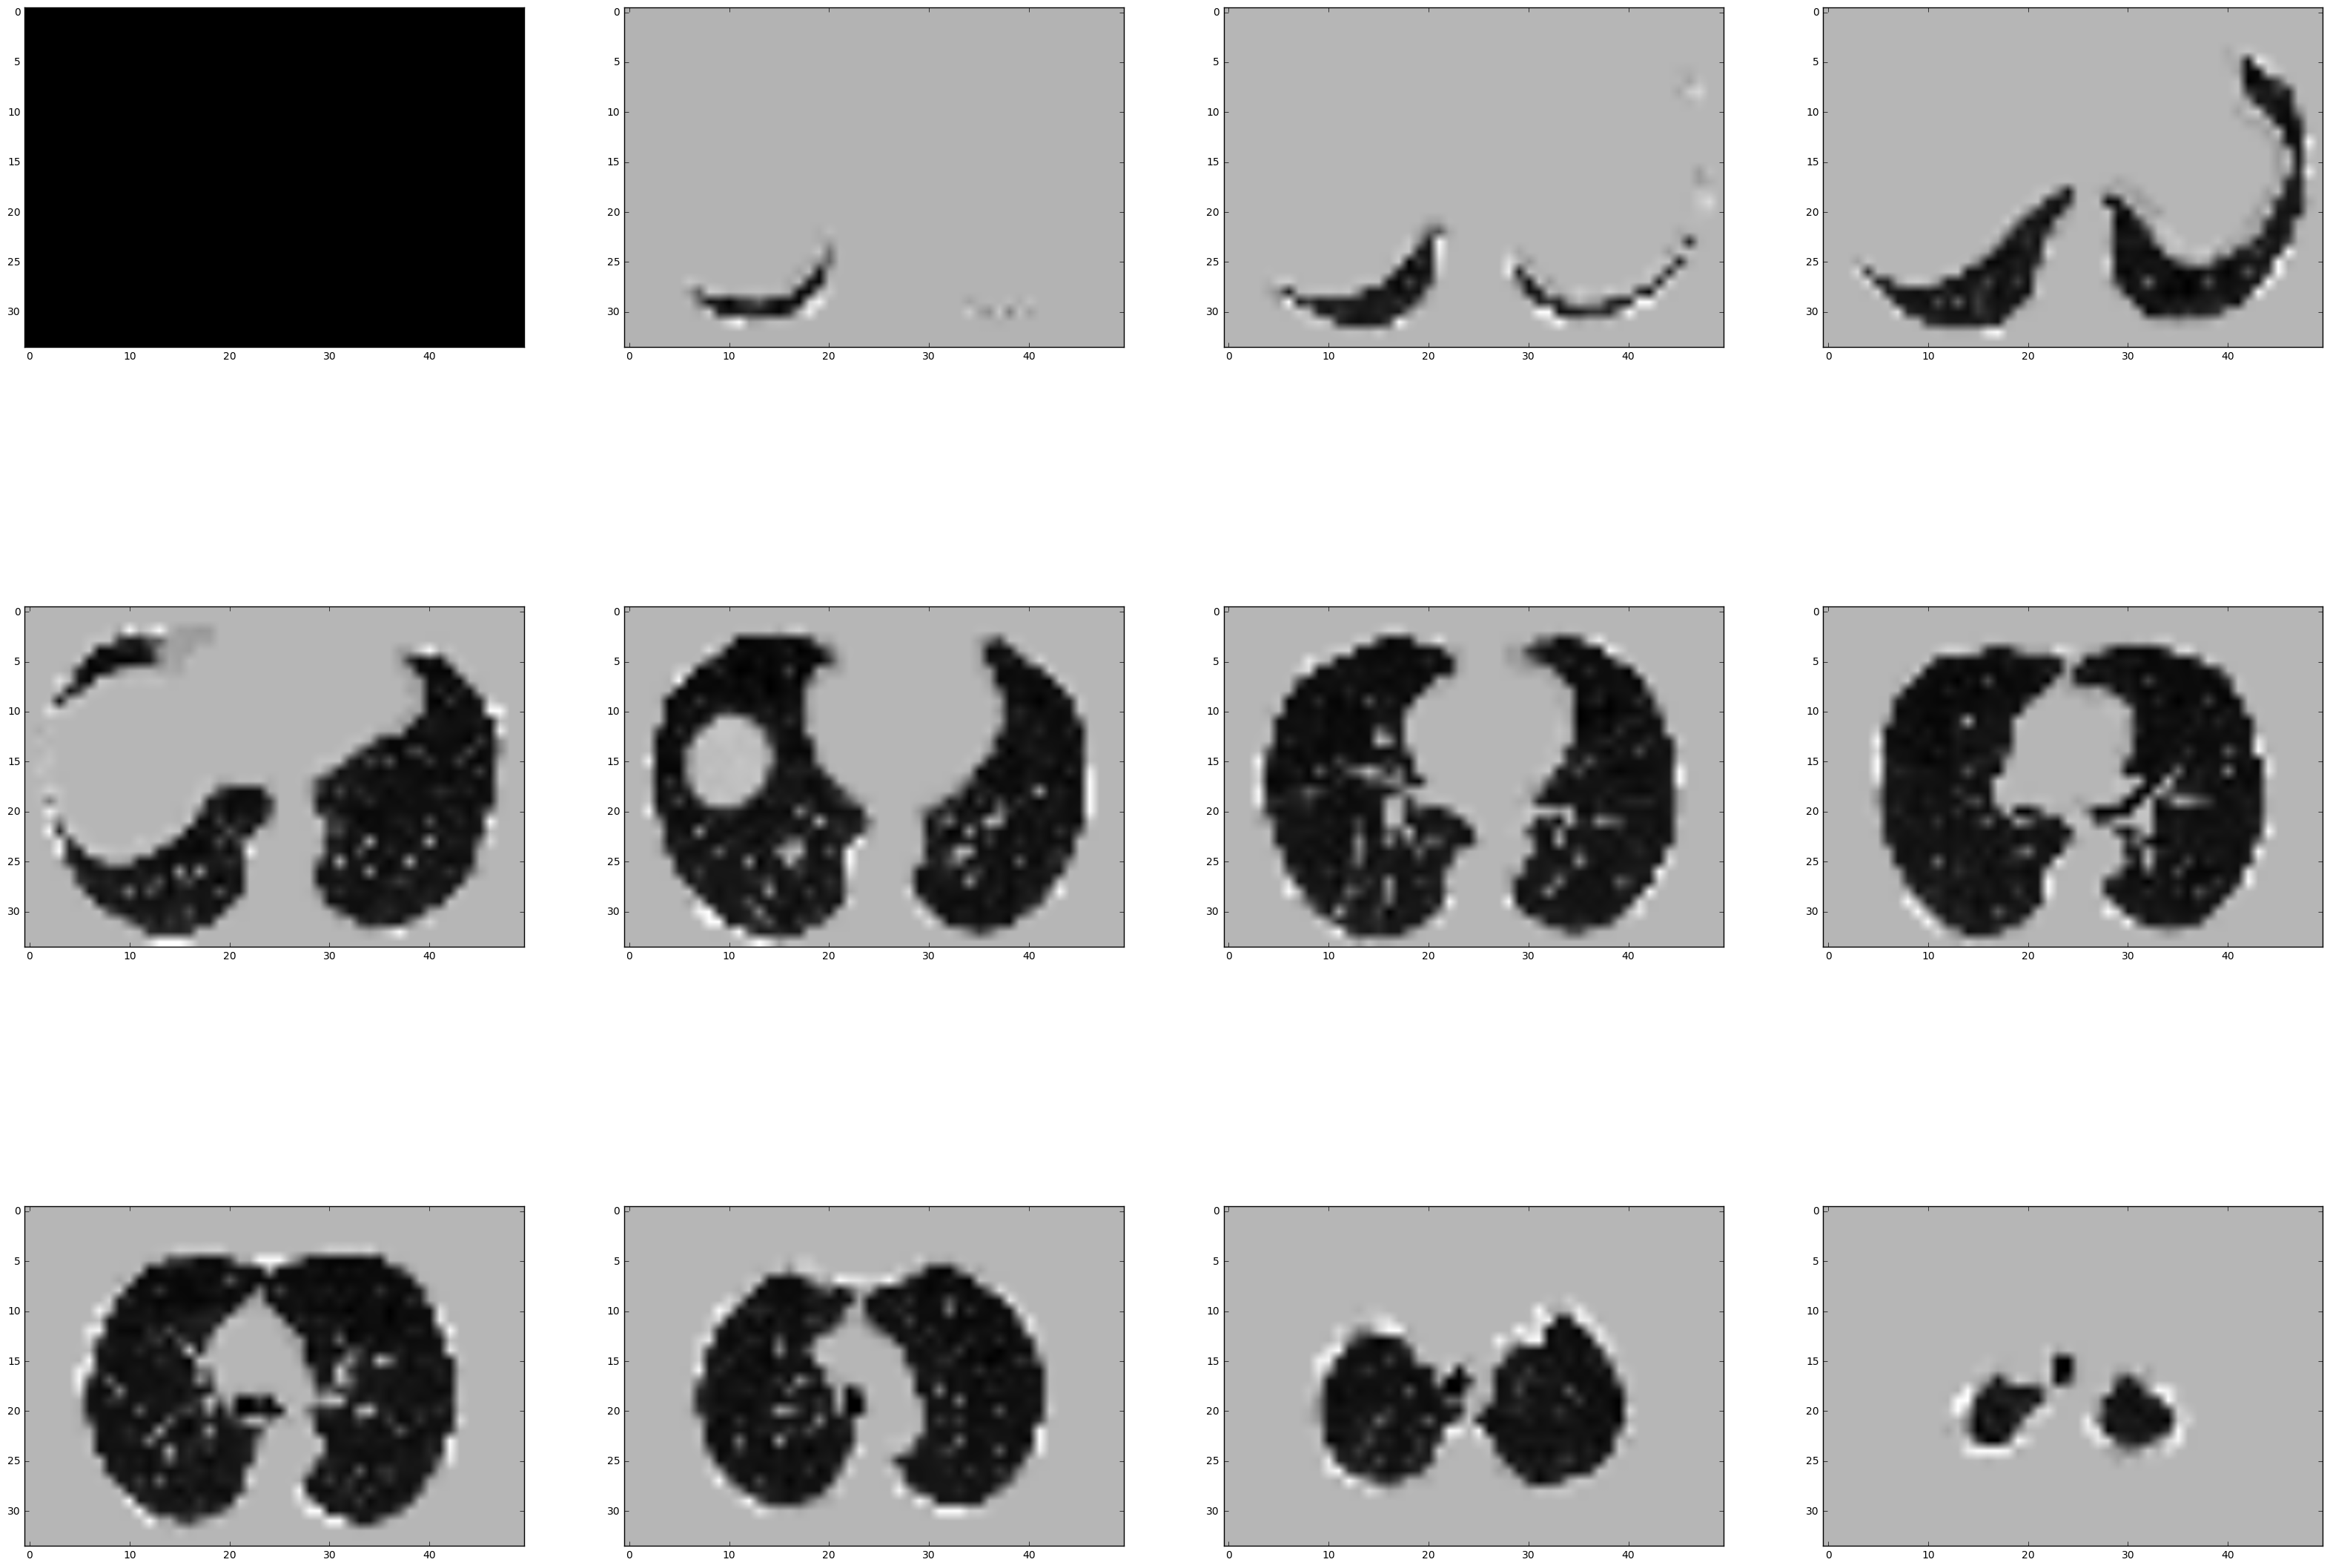

2017-02-22 03:00:28,263 INFO > [done]    Predicting result on CNN (forward) (5442.184 ms)
2017-02-22 03:00:28,265 INFO Prediction for patient 0ddeb08e9c97227853422bd71a2a695e is [[0.8958240151405334, 0.10417598485946655]]
2017-02-22 03:00:28,266 INFO >>> Predict patient_id 0d19f1c627df49eb223771c28548350e
2017-02-22 03:00:28,267 INFO Loading pre-processed images for patient
2017-02-22 03:00:28,268 DEBUG Patient image not found in cache
2017-02-22 03:00:28,269 INFO > [started] Preparing patient scan image volume. patient_id=0d19f1c627df49eb223771c28548350e...
2017-02-22 03:00:28,270 INFO > [started] load_scan ../../input/sample_images/0d19f1c627df49eb223771c28548350e...
2017-02-22 03:00:28,800 INFO > [done]    load_scan ../../input/sample_images/0d19f1c627df49eb223771c28548350e (530.192 ms)
2017-02-22 03:00:29,126 INFO > [started] resample...
2017-02-22 03:00:53,133 INFO > [done]    resample (24006.148 ms)
2017-02-22 03:00:53,139 INFO > [started] segment_lung_mask...
2017-02-22 03:00:58

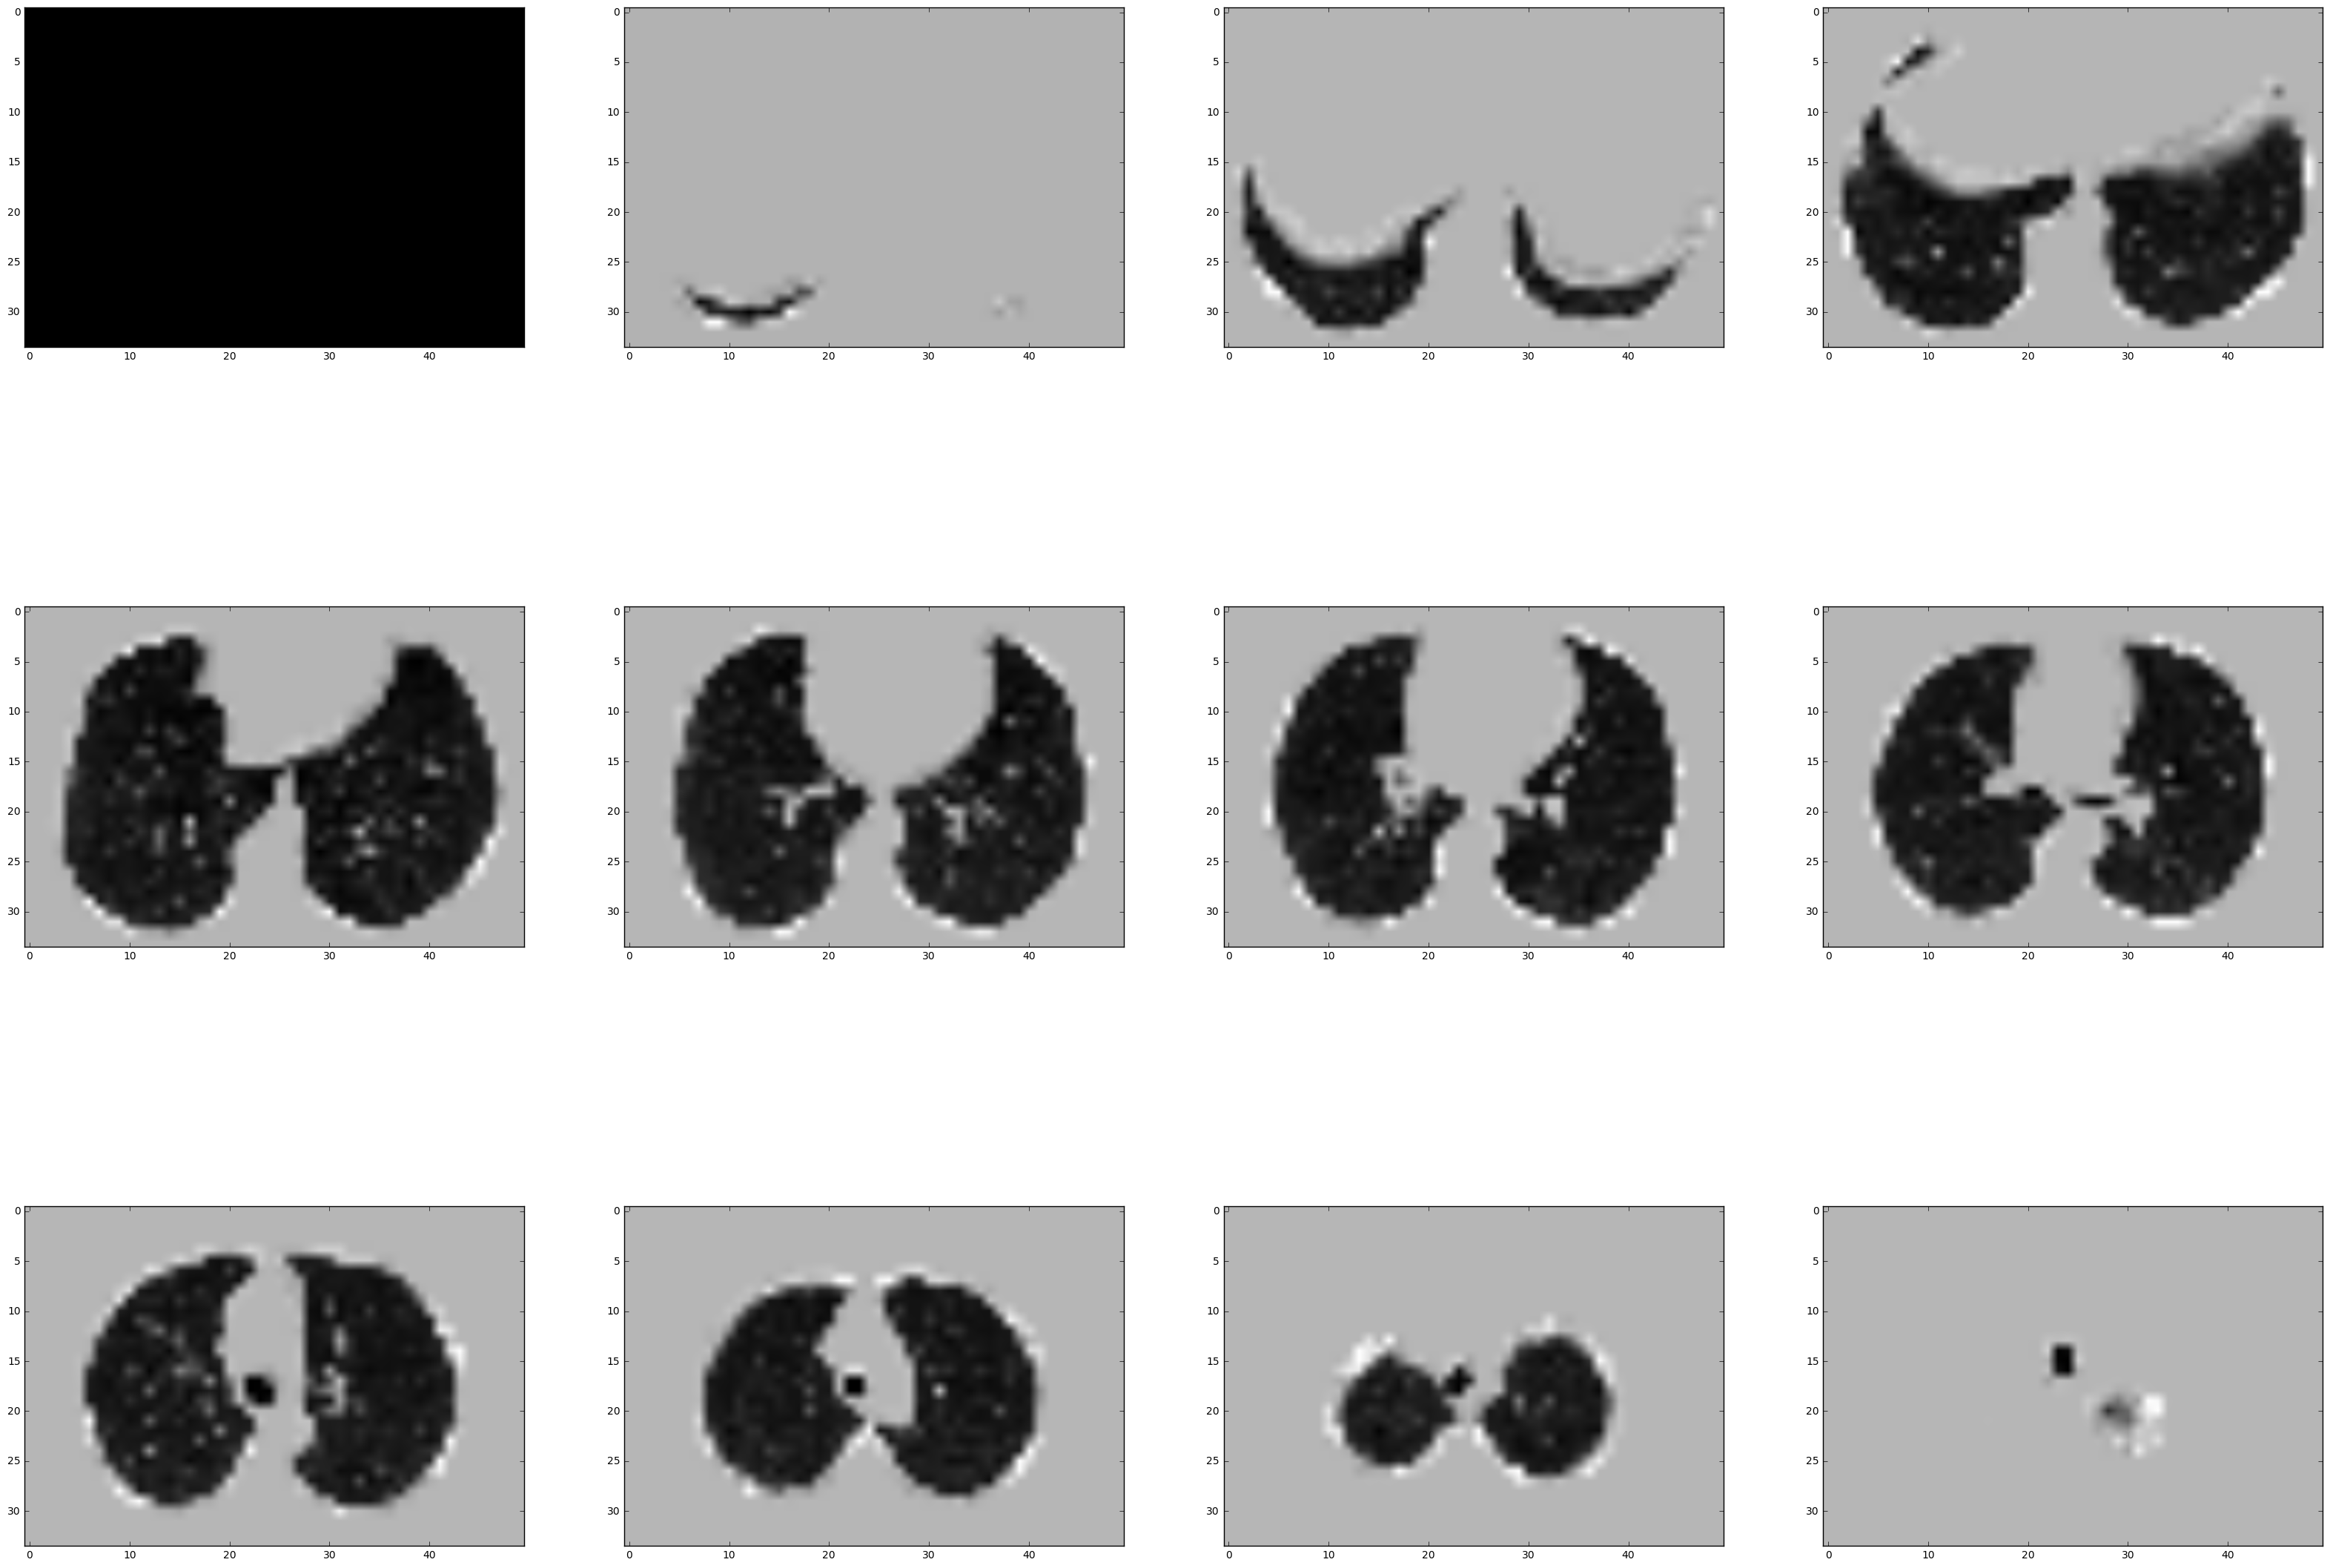

2017-02-22 03:01:15,977 INFO > [done]    Predicting result on CNN (forward) (5643.563 ms)
2017-02-22 03:01:15,979 INFO Prediction for patient 0d19f1c627df49eb223771c28548350e is [[0.8983542323112488, 0.1016458049416542]]
2017-02-22 03:01:15,980 INFO >>> Predict patient_id 0c0de3749d4fe175b7a5098b060982a1
2017-02-22 03:01:15,981 INFO Loading pre-processed images for patient
2017-02-22 03:01:15,982 DEBUG Patient image not found in cache
2017-02-22 03:01:15,982 INFO > [started] Preparing patient scan image volume. patient_id=0c0de3749d4fe175b7a5098b060982a1...
2017-02-22 03:01:15,983 INFO > [started] load_scan ../../input/sample_images/0c0de3749d4fe175b7a5098b060982a1...
2017-02-22 03:01:16,548 INFO > [done]    load_scan ../../input/sample_images/0c0de3749d4fe175b7a5098b060982a1 (565.110 ms)
2017-02-22 03:01:16,742 INFO > [started] resample...
2017-02-22 03:01:35,853 INFO > [done]    resample (19110.989 ms)
2017-02-22 03:01:35,859 INFO > [started] segment_lung_mask...
2017-02-22 03:01:40,

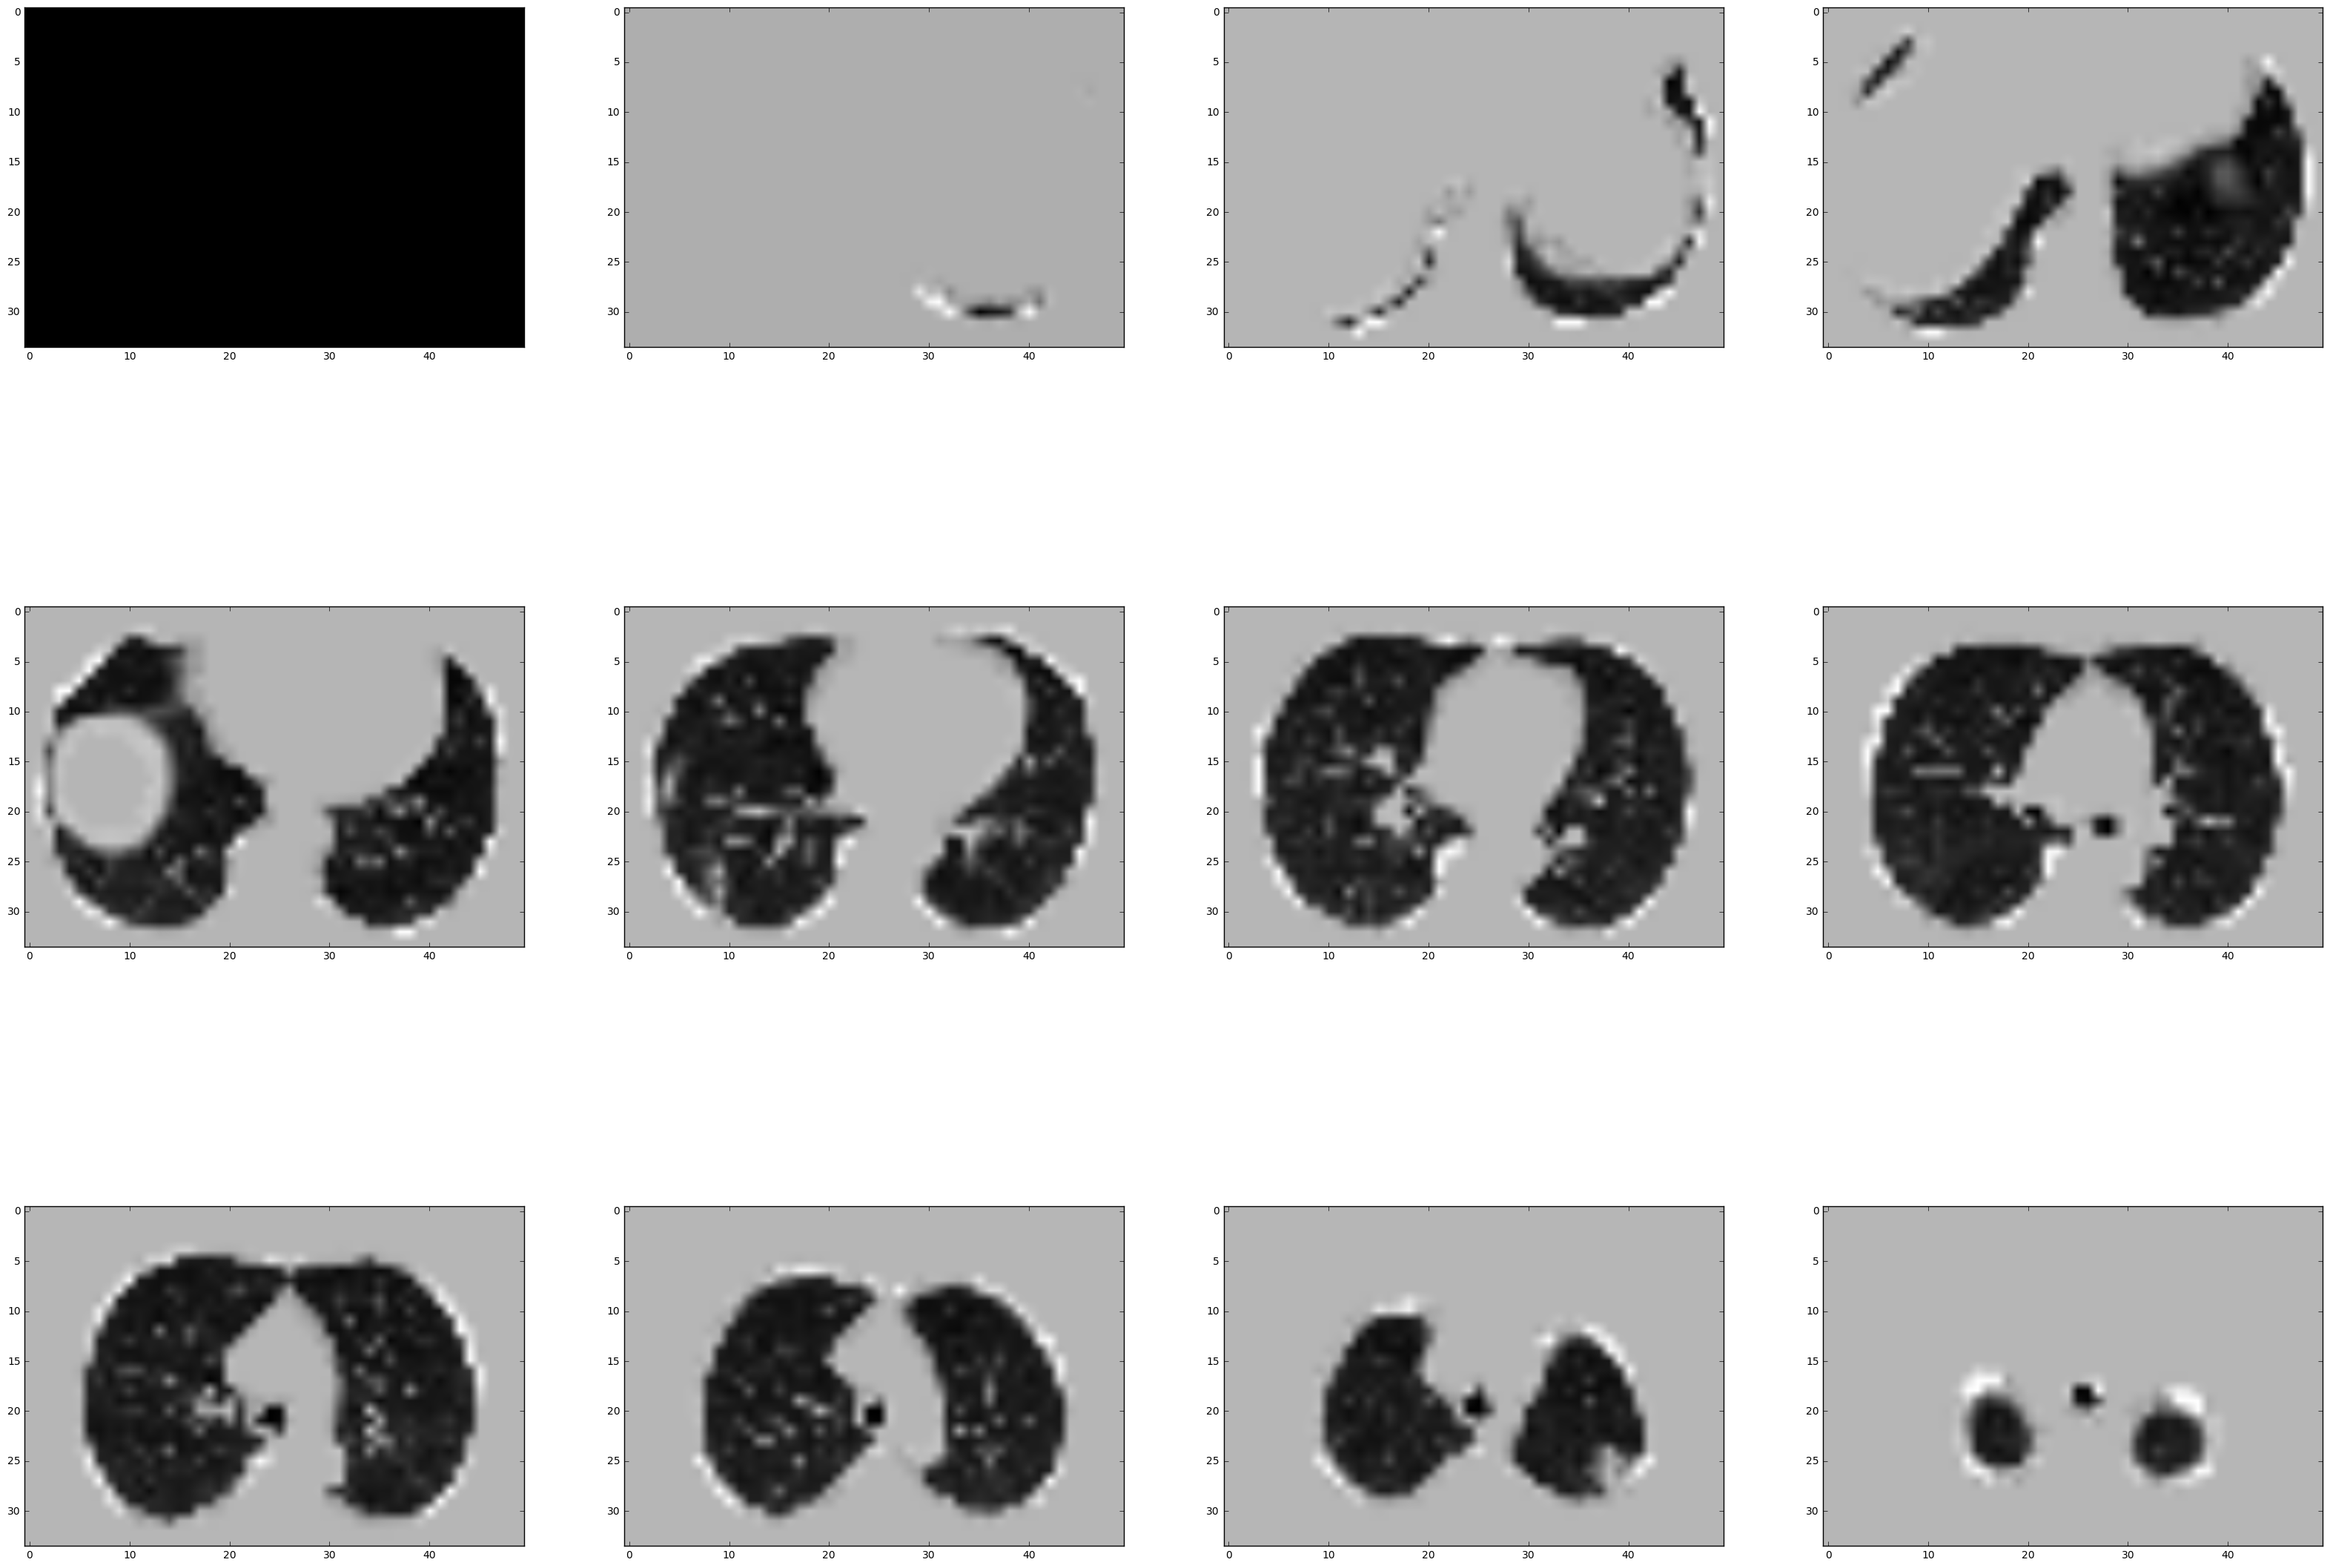

2017-02-22 03:01:54,636 INFO > [done]    Predicting result on CNN (forward) (5315.064 ms)
2017-02-22 03:01:54,645 INFO Prediction for patient 0c0de3749d4fe175b7a5098b060982a1 is [[0.8896860480308533, 0.11031387001276016]]
2017-02-22 03:01:54,646 INFO >>> Predict patient_id 0ca943d821204ceb089510f836a367fd
2017-02-22 03:01:54,647 INFO Loading pre-processed images for patient
2017-02-22 03:01:54,648 DEBUG Patient image not found in cache
2017-02-22 03:01:54,648 INFO > [started] Preparing patient scan image volume. patient_id=0ca943d821204ceb089510f836a367fd...
2017-02-22 03:01:54,649 INFO > [started] load_scan ../../input/sample_images/0ca943d821204ceb089510f836a367fd...
2017-02-22 03:01:55,608 INFO > [done]    load_scan ../../input/sample_images/0ca943d821204ceb089510f836a367fd (958.951 ms)
2017-02-22 03:01:56,040 INFO > [started] resample...
2017-02-22 03:02:10,237 INFO > [done]    resample (14197.004 ms)
2017-02-22 03:02:10,242 INFO > [started] segment_lung_mask...
2017-02-22 03:02:13

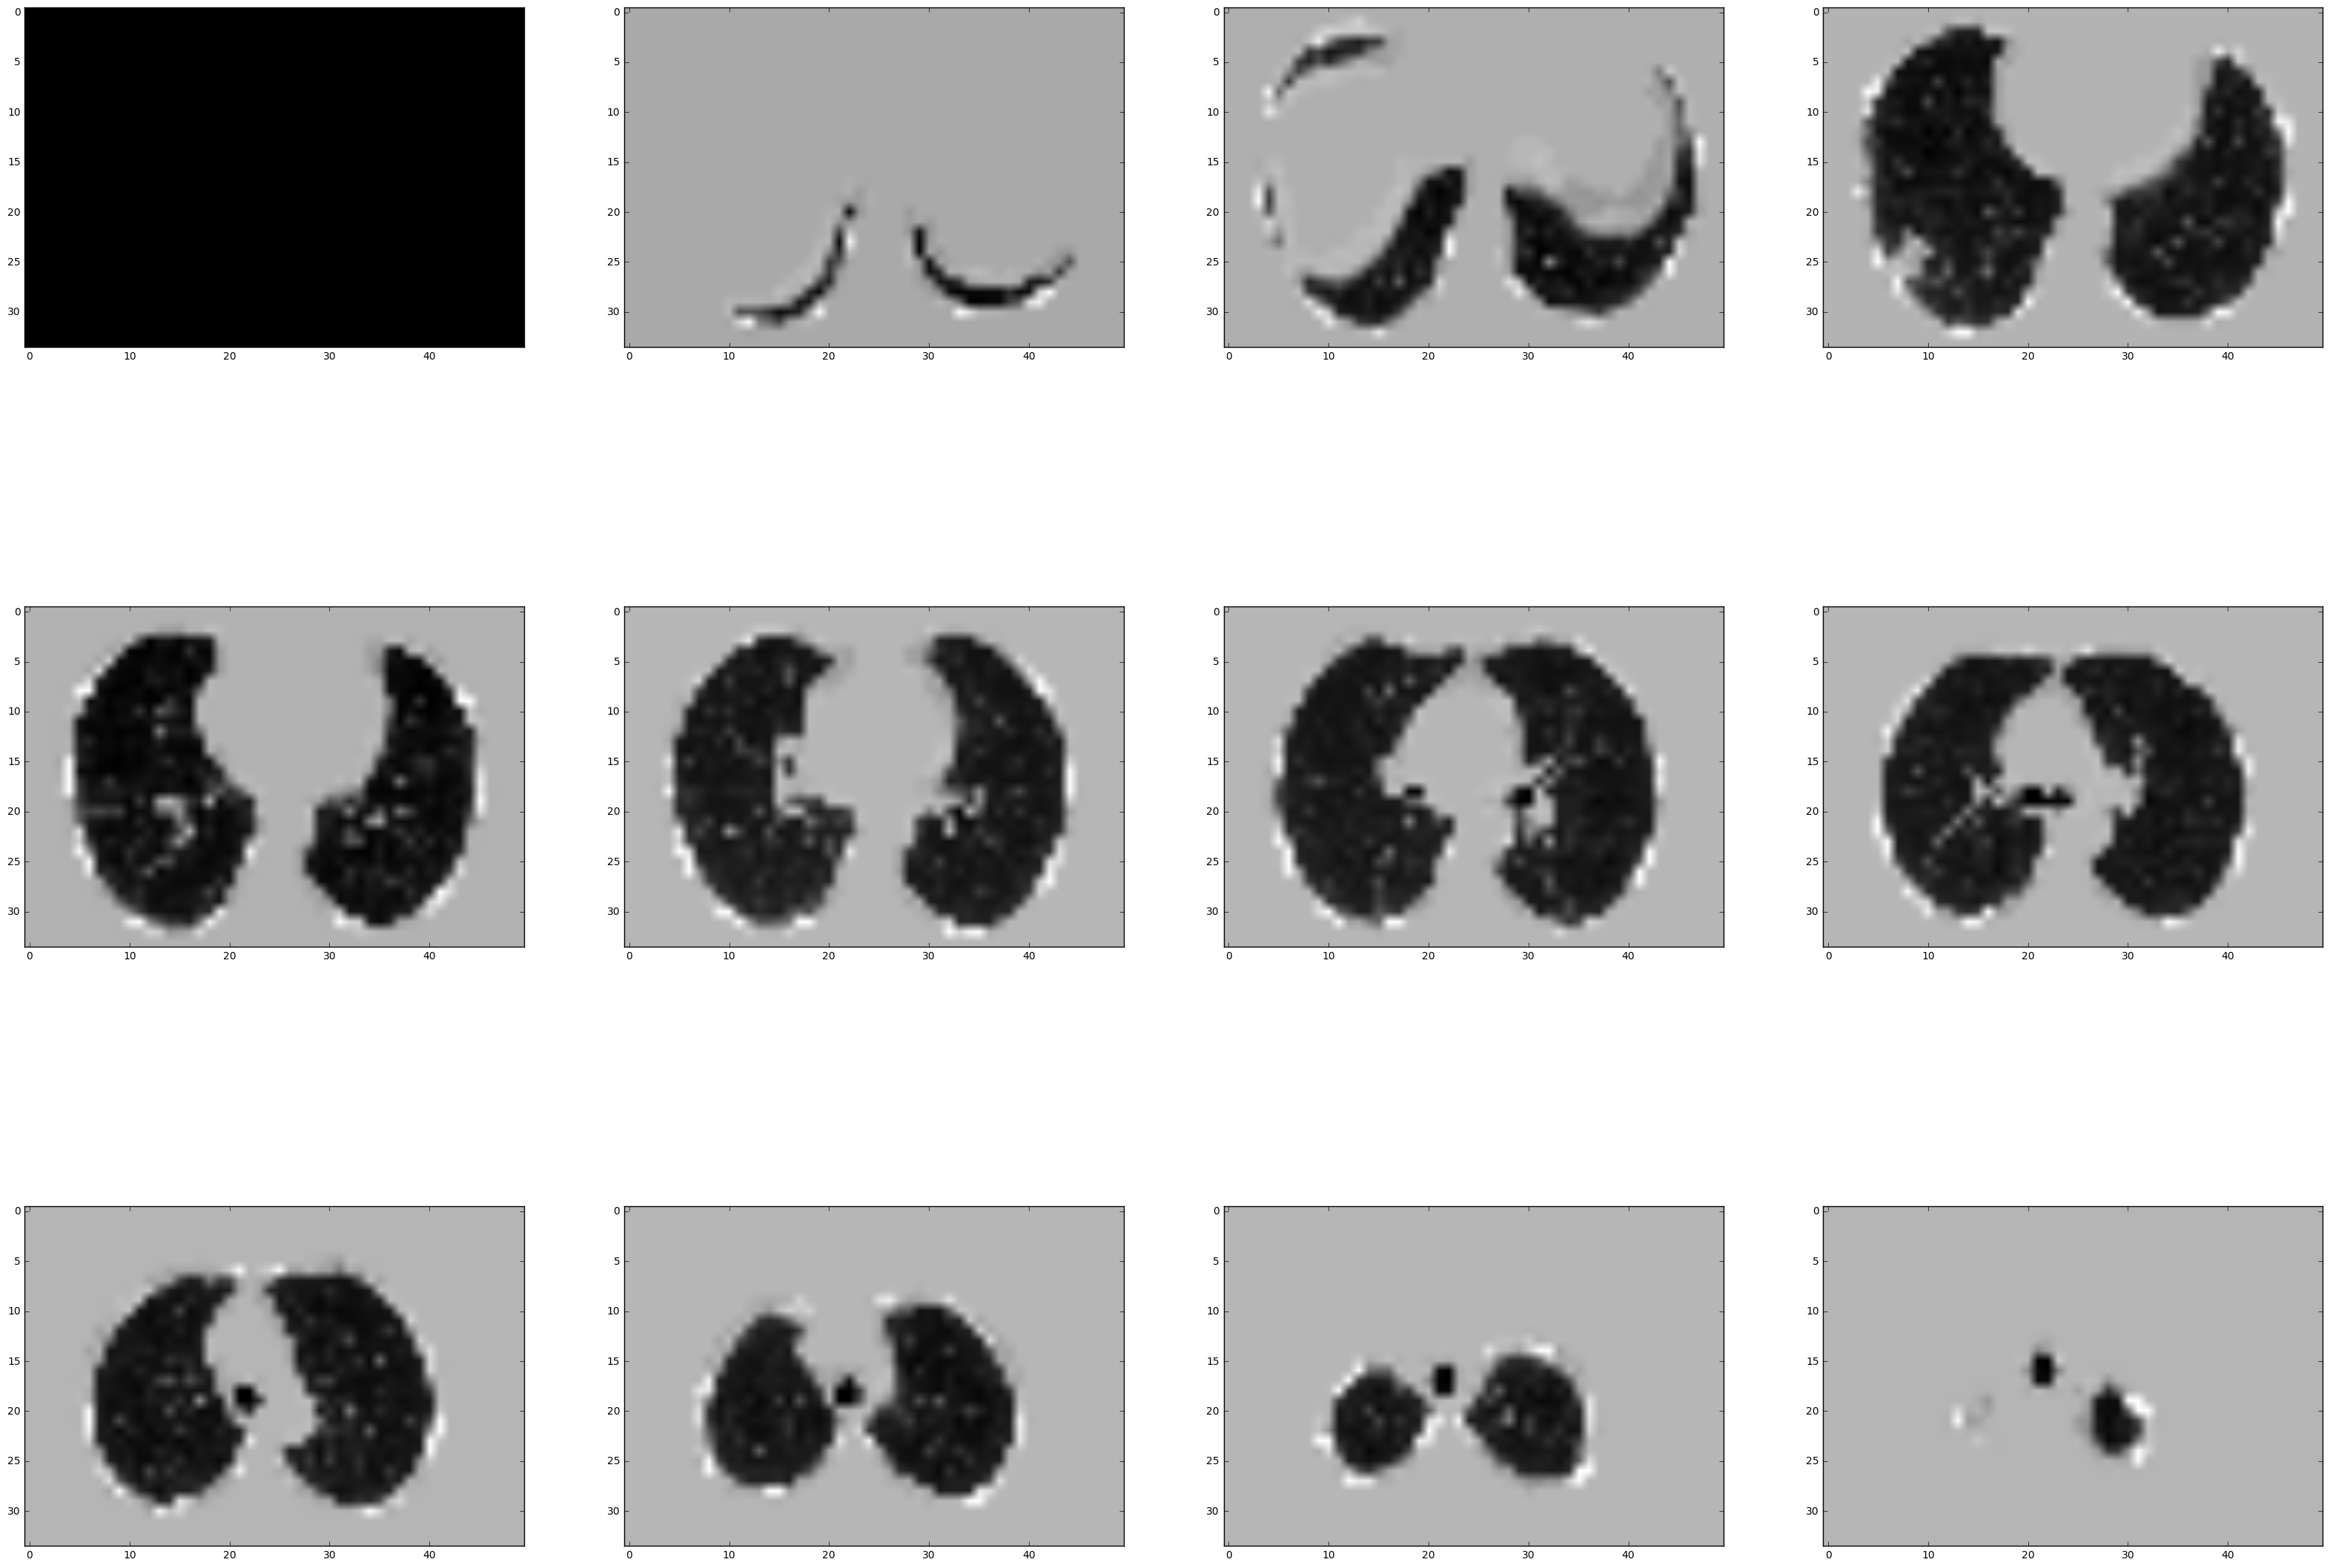

2017-02-22 03:02:24,611 INFO > [done]    Predicting result on CNN (forward) (5144.125 ms)
2017-02-22 03:02:24,617 INFO Prediction for patient 0ca943d821204ceb089510f836a367fd is [[0.8944178223609924, 0.10558219999074936]]
2017-02-22 03:02:24,618 INFO >>> Predict patient_id 0d06d764d3c07572074d468b4cff954f
2017-02-22 03:02:24,619 INFO Loading pre-processed images for patient
2017-02-22 03:02:24,621 DEBUG Patient image not found in cache
2017-02-22 03:02:24,622 INFO > [started] Preparing patient scan image volume. patient_id=0d06d764d3c07572074d468b4cff954f...
2017-02-22 03:02:24,624 INFO > [started] load_scan ../../input/sample_images/0d06d764d3c07572074d468b4cff954f...
2017-02-22 03:02:27,040 INFO > [done]    load_scan ../../input/sample_images/0d06d764d3c07572074d468b4cff954f (2416.071 ms)
2017-02-22 03:02:27,732 INFO > [started] resample...
2017-02-22 03:03:00,876 INFO > [done]    resample (33143.882 ms)
2017-02-22 03:03:00,891 INFO > [started] segment_lung_mask...
2017-02-22 03:03:0

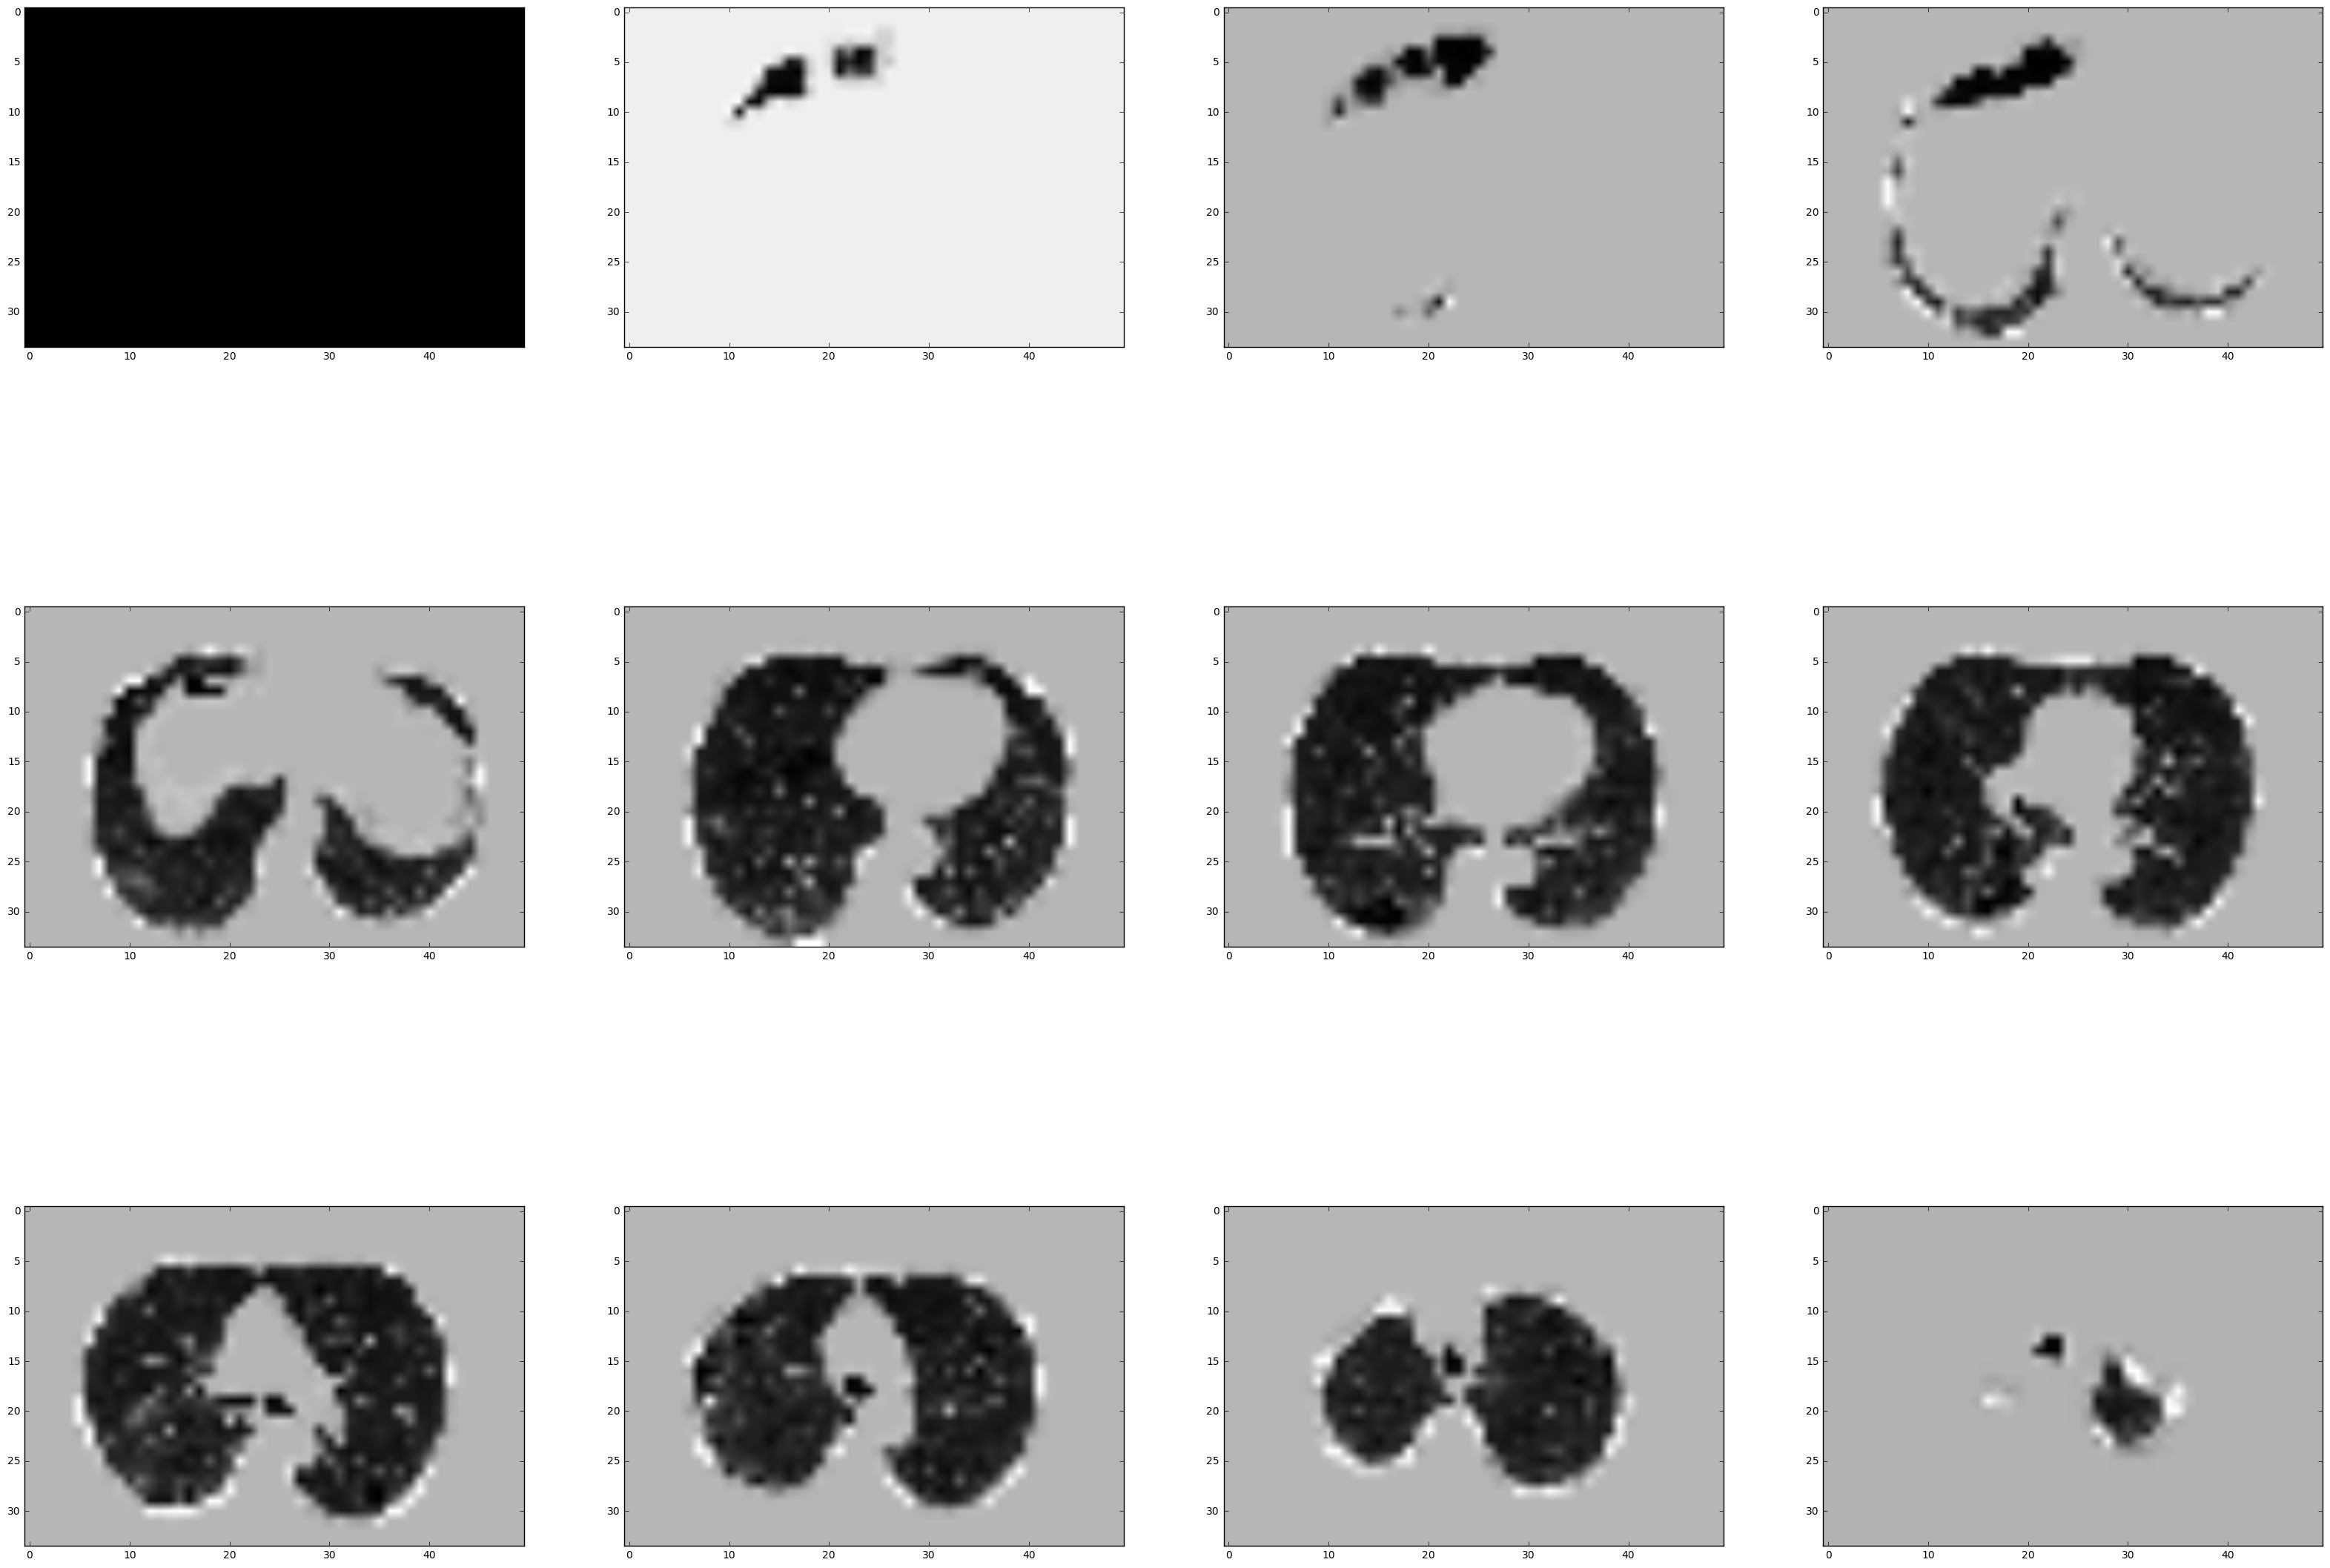

2017-02-22 03:03:23,809 INFO > [done]    Predicting result on CNN (forward) (5299.533 ms)
2017-02-22 03:03:23,823 INFO Prediction for patient 0d06d764d3c07572074d468b4cff954f is [[0.8555088043212891, 0.14449121057987213]]
2017-02-22 03:03:23,824 INFO >>> Predict patient_id 0d941a3ad6c889ac451caf89c46cb92a
2017-02-22 03:03:23,825 INFO Loading pre-processed images for patient
2017-02-22 03:03:23,826 DEBUG Patient image not found in cache
2017-02-22 03:03:23,827 INFO > [started] Preparing patient scan image volume. patient_id=0d941a3ad6c889ac451caf89c46cb92a...
2017-02-22 03:03:23,828 INFO > [started] load_scan ../../input/sample_images/0d941a3ad6c889ac451caf89c46cb92a...
2017-02-22 03:03:25,039 INFO > [done]    load_scan ../../input/sample_images/0d941a3ad6c889ac451caf89c46cb92a (1211.218 ms)
2017-02-22 03:03:25,353 INFO > [started] resample...
2017-02-22 03:03:38,594 INFO > [done]    resample (13240.775 ms)
2017-02-22 03:03:38,601 INFO > [started] segment_lung_mask...
2017-02-22 03:03:4

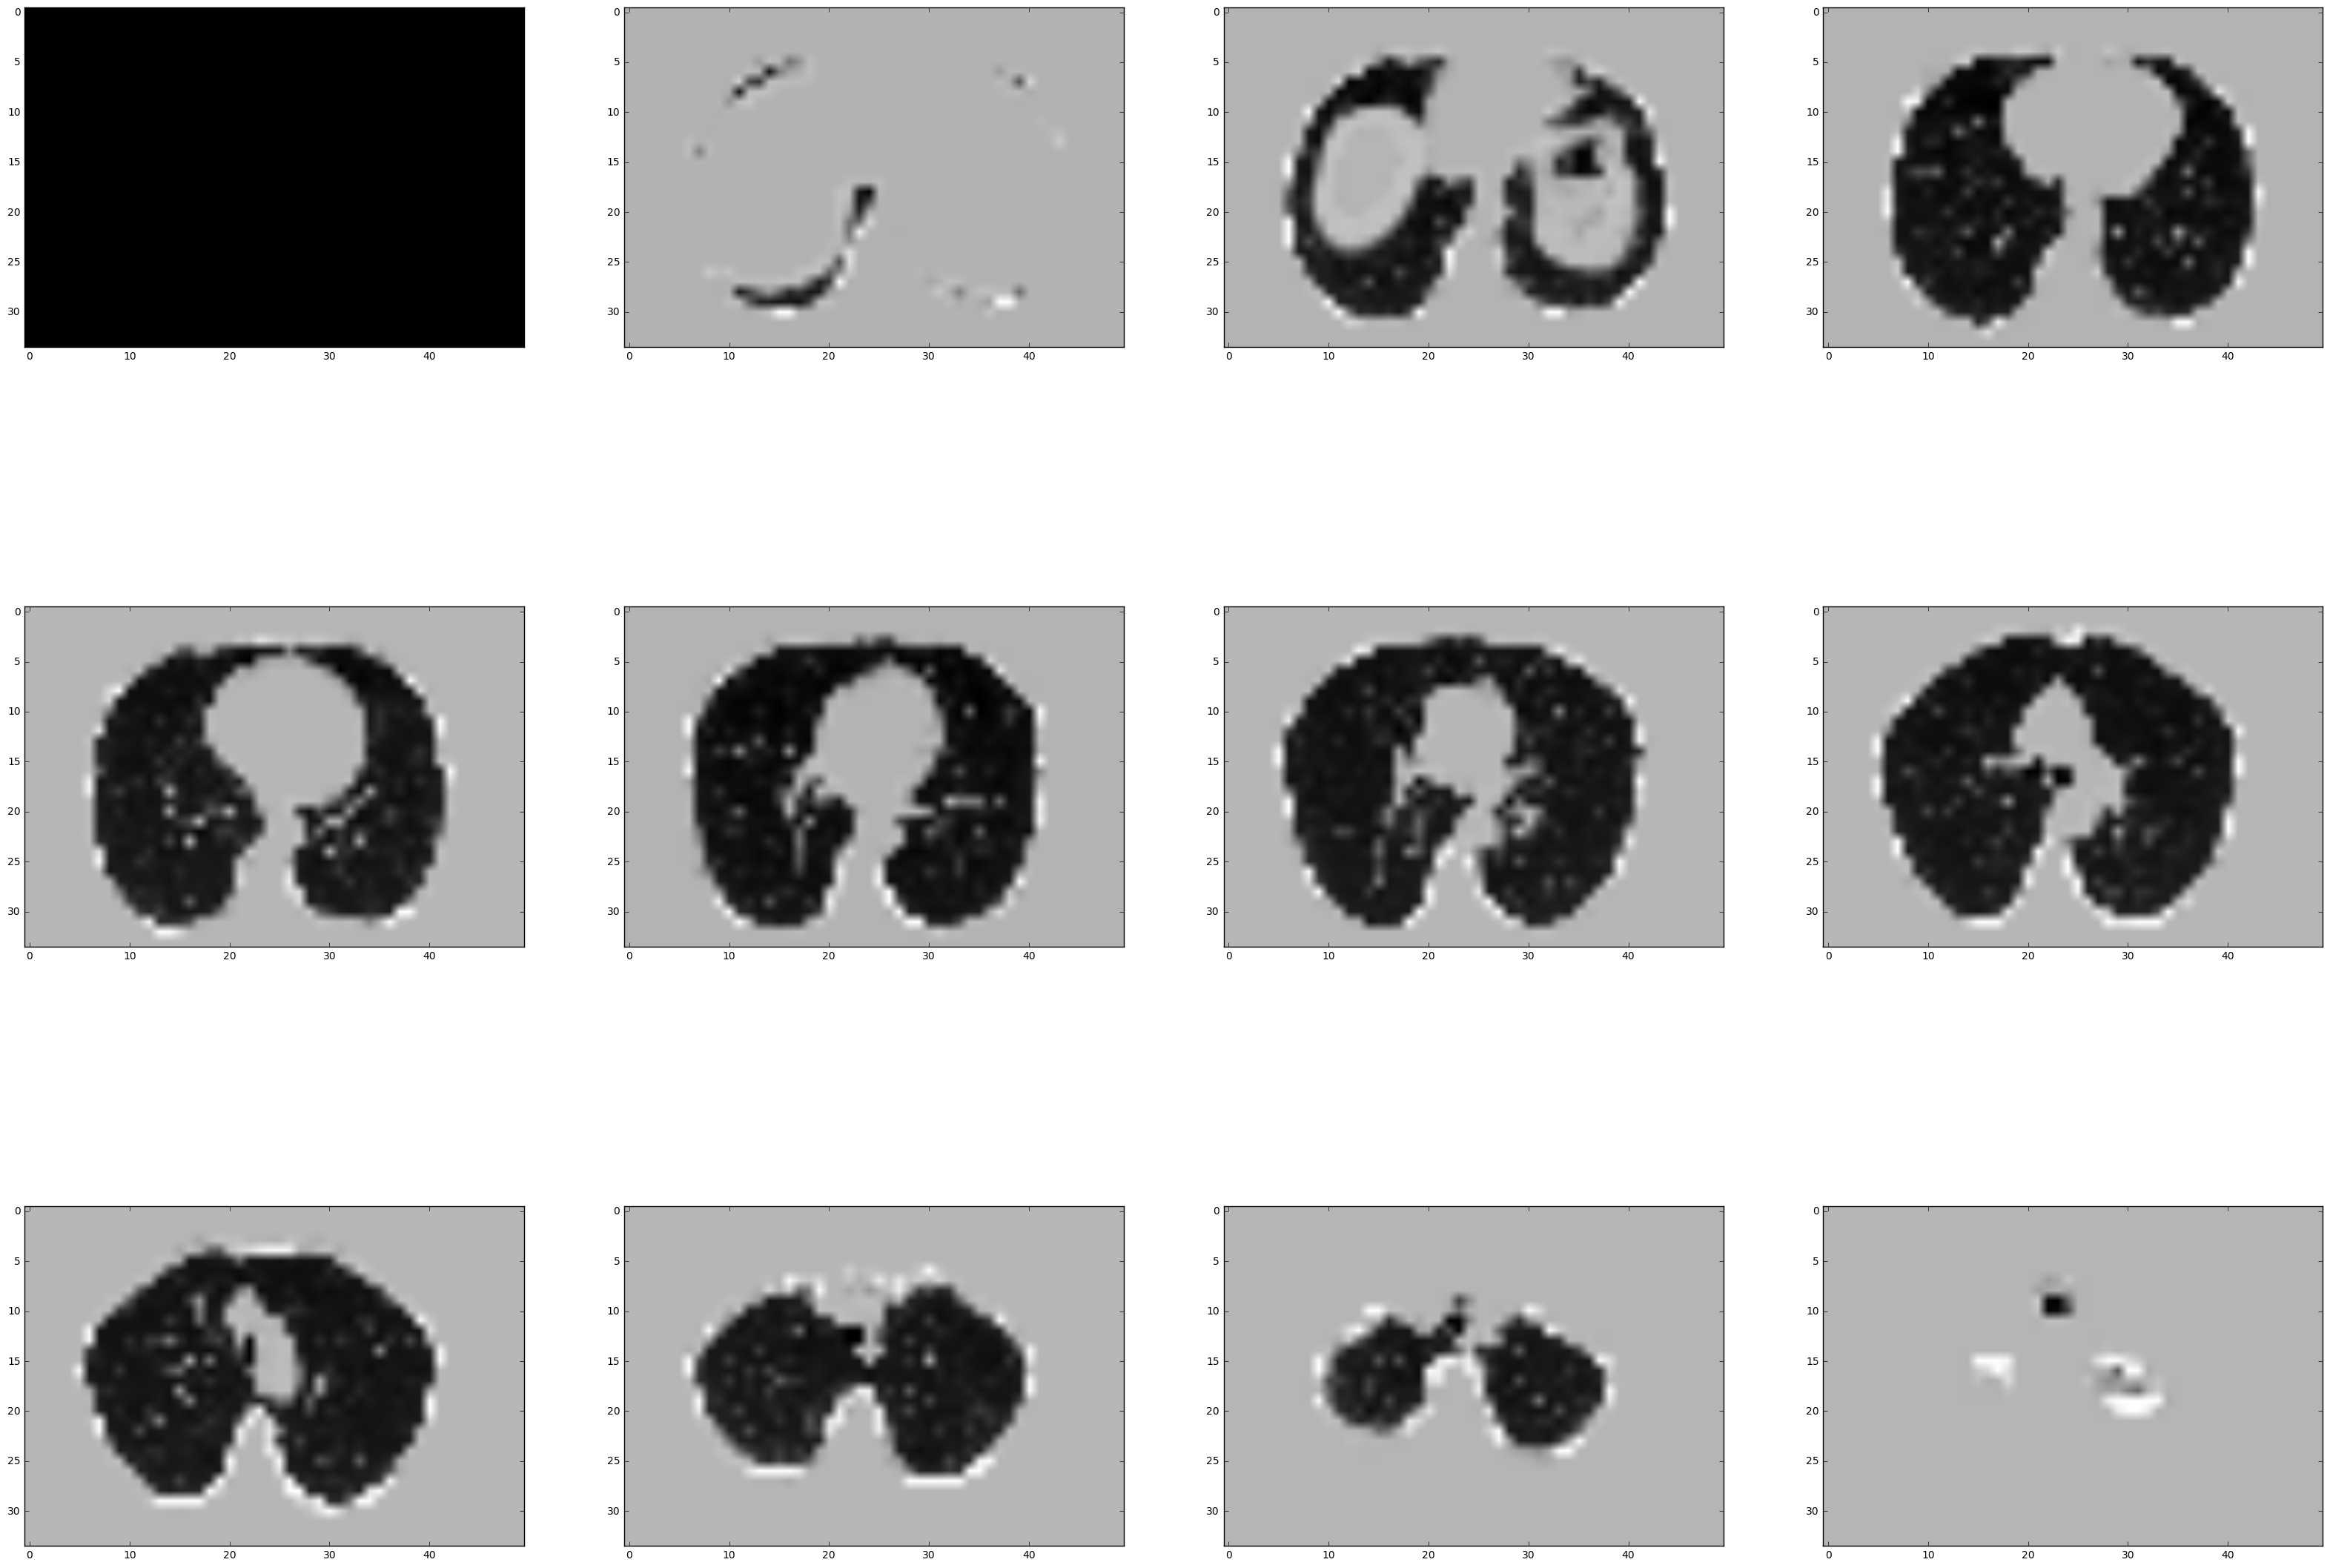

2017-02-22 03:03:52,222 INFO > [done]    Predicting result on CNN (forward) (5646.973 ms)
2017-02-22 03:03:52,223 INFO Prediction for patient 0d941a3ad6c889ac451caf89c46cb92a is [[0.8928446769714355, 0.10715530067682266]]
2017-02-22 03:03:52,224 INFO >>> Predict patient_id 0c59313f52304e25d5a7dcf9877633b1
2017-02-22 03:03:52,225 INFO Loading pre-processed images for patient
2017-02-22 03:03:52,226 DEBUG Patient image not found in cache
2017-02-22 03:03:52,226 INFO > [started] Preparing patient scan image volume. patient_id=0c59313f52304e25d5a7dcf9877633b1...
2017-02-22 03:03:52,227 INFO > [started] load_scan ../../input/sample_images/0c59313f52304e25d5a7dcf9877633b1...
2017-02-22 03:03:53,353 INFO > [done]    load_scan ../../input/sample_images/0c59313f52304e25d5a7dcf9877633b1 (1125.813 ms)
2017-02-22 03:03:53,808 INFO > [started] resample...
2017-02-22 03:04:18,232 INFO > [done]    resample (24424.013 ms)
2017-02-22 03:04:18,239 INFO > [started] segment_lung_mask...
2017-02-22 03:04:2

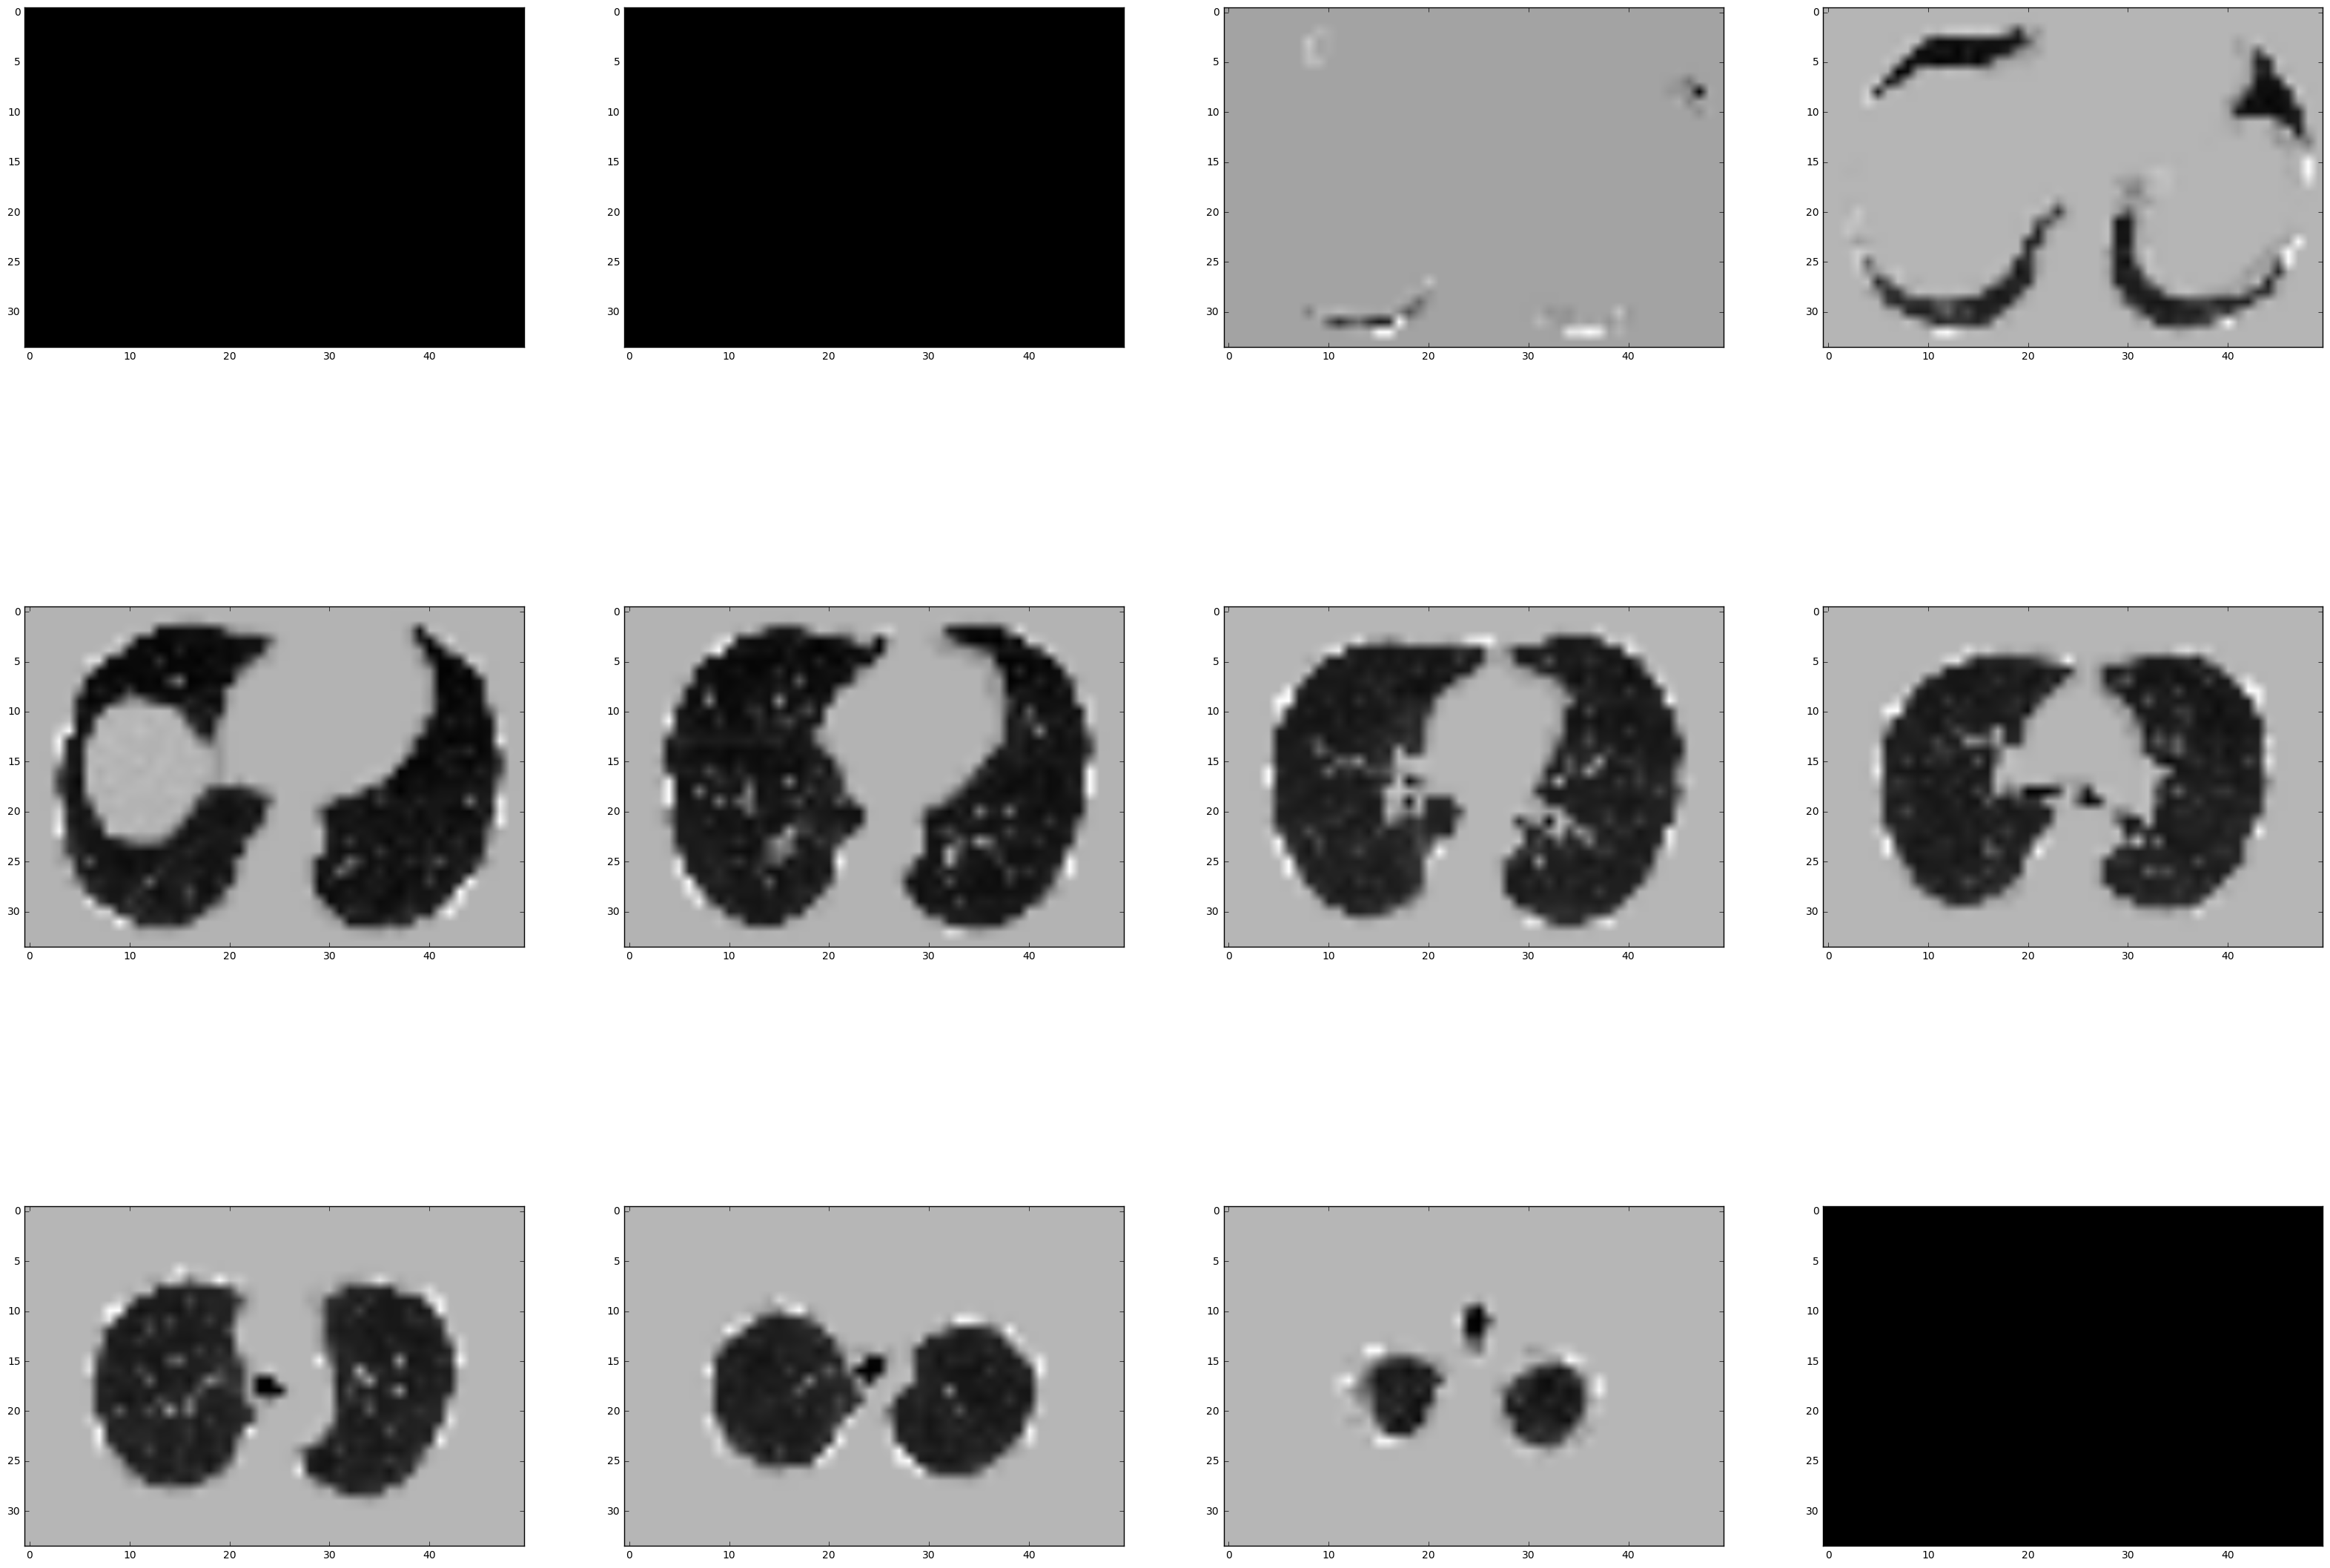

2017-02-22 03:04:39,718 INFO > [done]    Predicting result on CNN (forward) (5300.193 ms)
2017-02-22 03:04:39,725 INFO Prediction for patient 0c59313f52304e25d5a7dcf9877633b1 is [[0.8619314432144165, 0.1380685418844223]]
2017-02-22 03:04:39,726 INFO >>> Predict patient_id 0c37613214faddf8701ca41e6d43f56e
2017-02-22 03:04:39,727 INFO Loading pre-processed images for patient
2017-02-22 03:04:39,728 DEBUG Patient image not found in cache
2017-02-22 03:04:39,728 INFO > [started] Preparing patient scan image volume. patient_id=0c37613214faddf8701ca41e6d43f56e...
2017-02-22 03:04:39,729 INFO > [started] load_scan ../../input/sample_images/0c37613214faddf8701ca41e6d43f56e...
2017-02-22 03:04:40,780 INFO > [done]    load_scan ../../input/sample_images/0c37613214faddf8701ca41e6d43f56e (1051.384 ms)
2017-02-22 03:04:41,079 INFO > [started] resample...
2017-02-22 03:05:00,730 INFO > [done]    resample (19651.003 ms)
2017-02-22 03:05:00,737 INFO > [started] segment_lung_mask...
2017-02-22 03:05:05

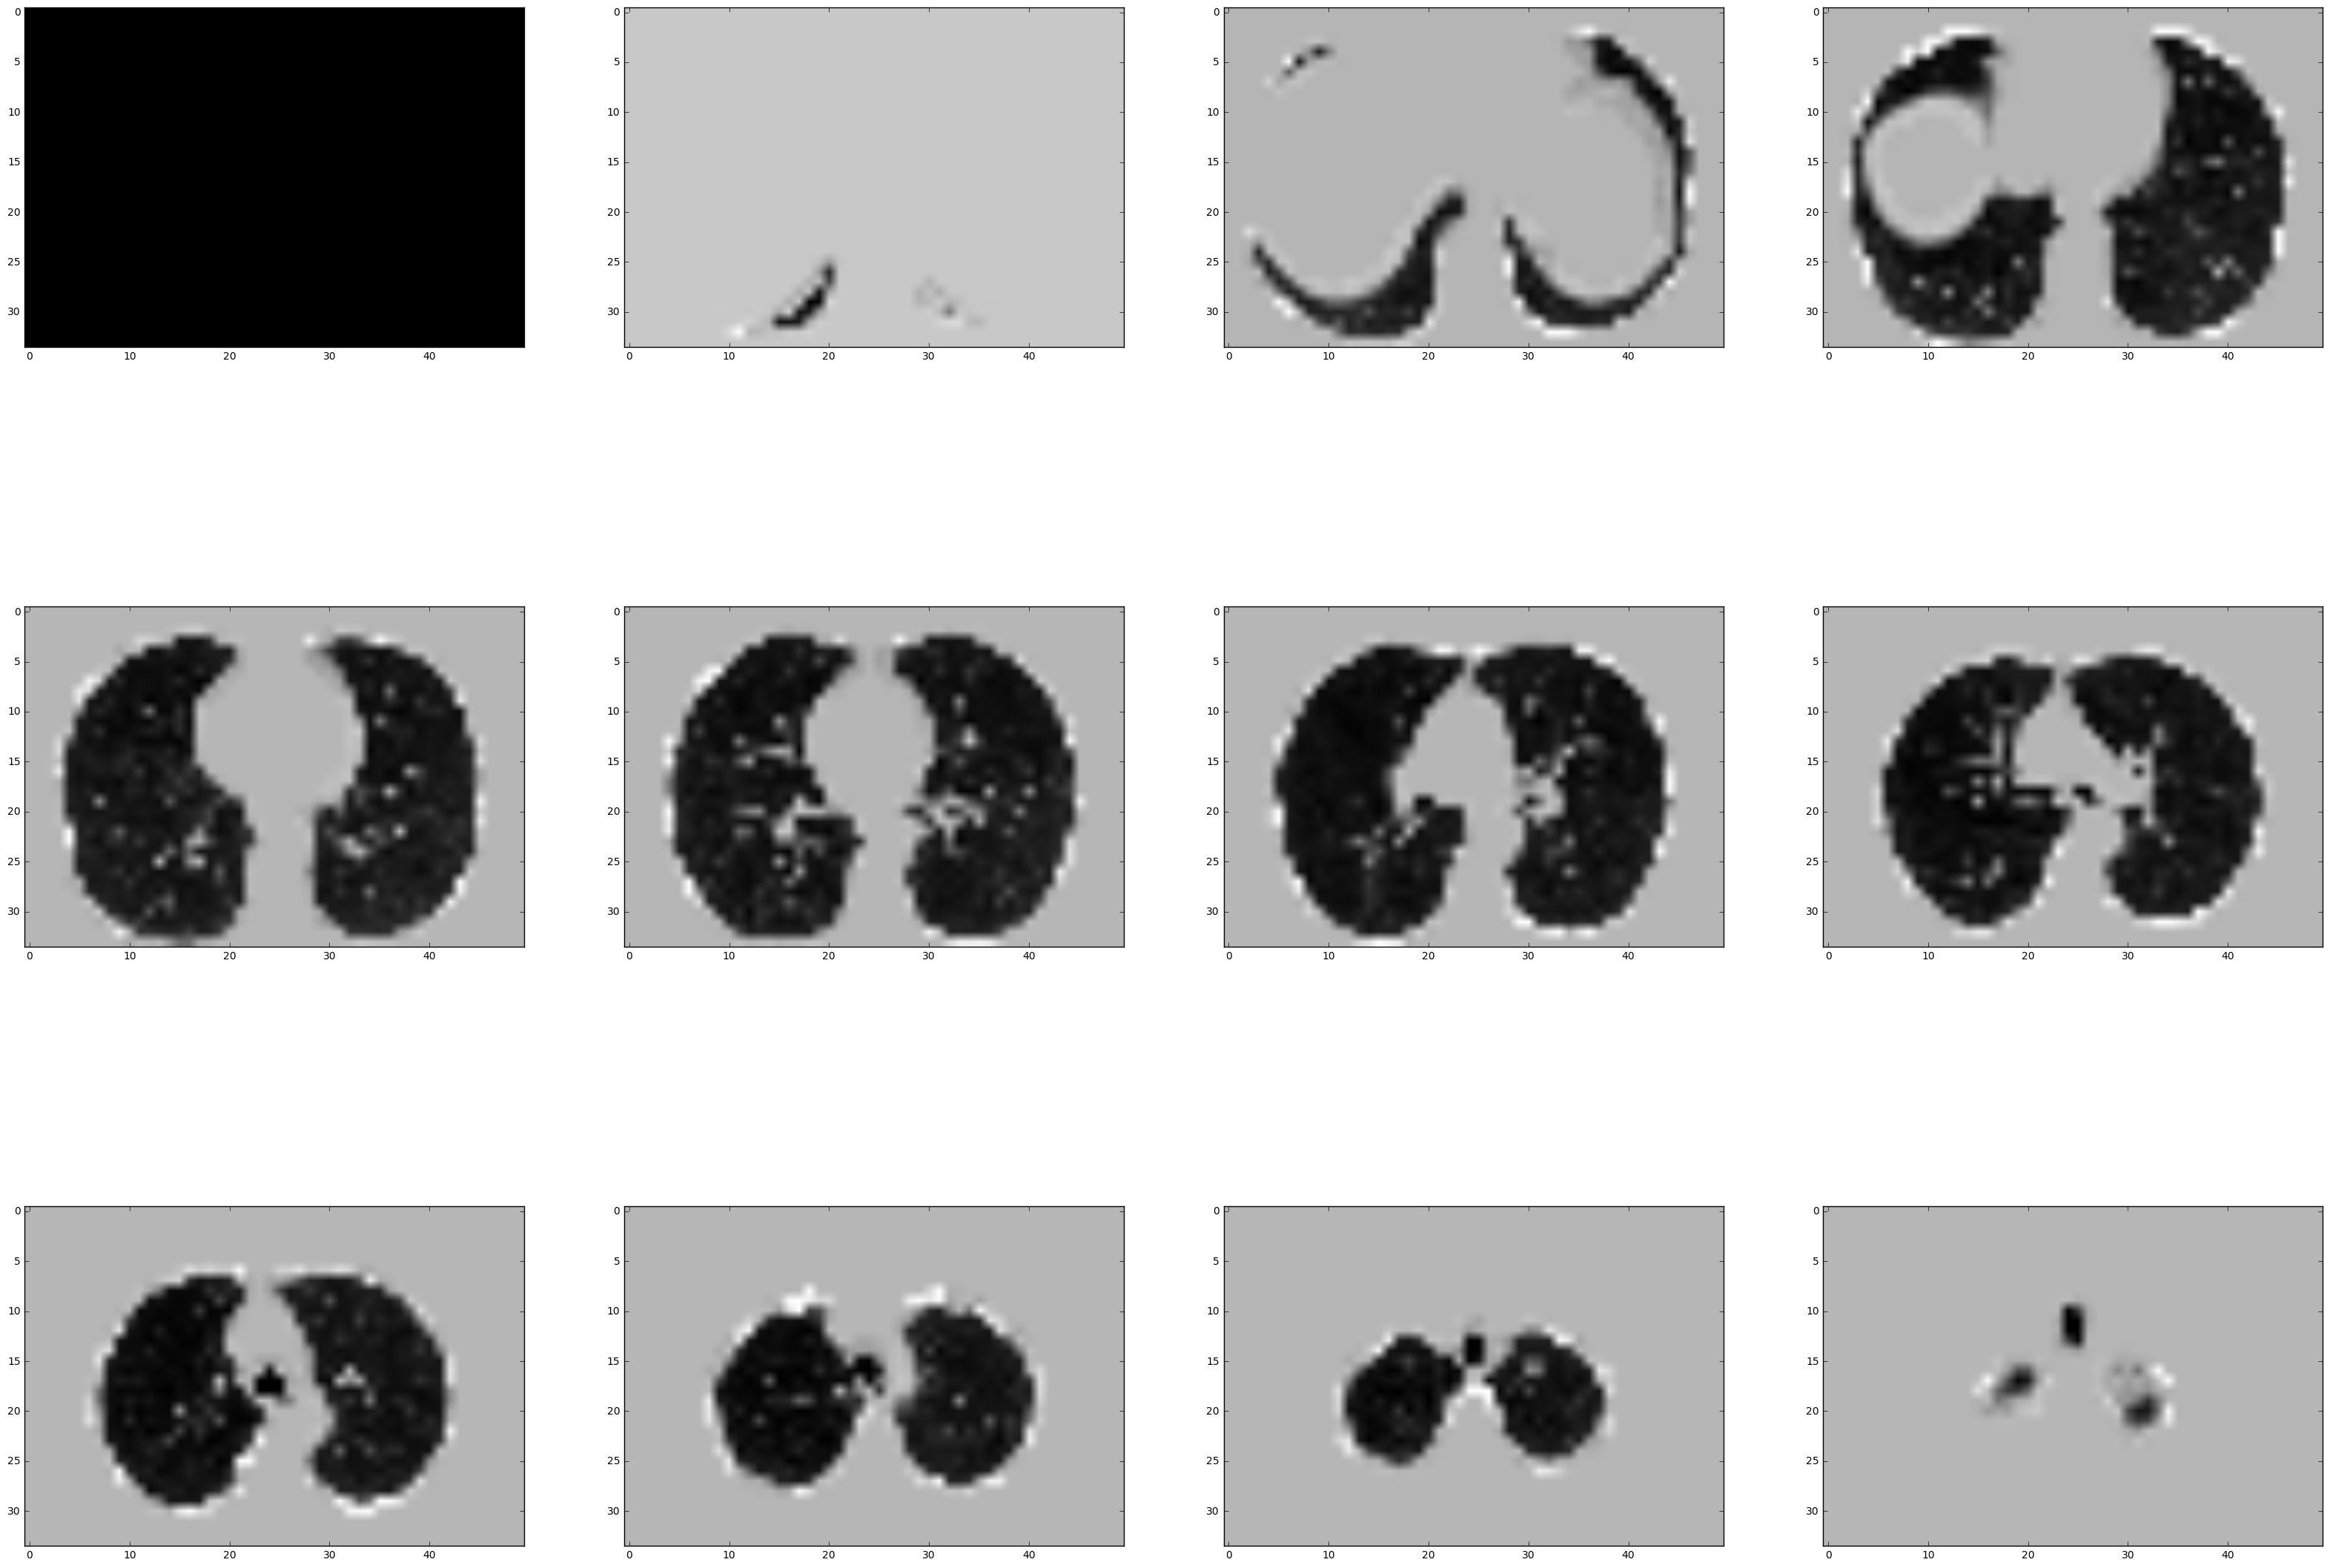

2017-02-22 03:05:19,930 INFO > [done]    Predicting result on CNN (forward) (5357.772 ms)
2017-02-22 03:05:19,931 INFO Prediction for patient 0c37613214faddf8701ca41e6d43f56e is [[0.9049966931343079, 0.09500331431627274]]
2017-02-22 03:05:19,932 INFO ==== ALL DONE ====


In [5]:
logger.info('==== PROCESSING PREDICTION ====')
start_processing(INPUT_FOLDER, PATIENTS_FILE, CNN_MODEL_FILE, 9, IMAGE_DIMS, OUTPUT_FOLDER)
logger.info('==== ALL DONE ====')